# 1 - Perkenalan

Nama      : Muhamamd Aji Satrio Wiyogo

Batch     : FTDS - RMT - 20

Dataset   : https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=census_adult_income&page=table&project=exercisehacktiv8&ws=!1m5!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scensus_adult_income

Objective : Analisis ini bertujuan untuk memprediksi apakah seseorang akan mengalami keterlambatan atau gagal dalam pembayaran kartu kredit pada bulan berikutnya. Saya disini akan menggunakan data kartu kredit yang tersedia dan mengimplementasikan beberapa algoritma seperti Logistic Regression, SVM, Decision Tree, Random Forest, KNN, Naive Bayes, atau algoritma lainny untuk membuat model. Setelahnya saya akan menggunakan cross-validation untuk membandingkan kinerja algoritma-algoritma tersebut dan melakukan hyperparameter tuning untuk meningkatkan performa model yang terpilih.

# 2 - Query SQL


In [1]:
'''
Query SQL

SELECT
  CAST(sex AS INT64) AS sex_int,
  CAST(education_level AS INT64) AS education_level_int,
  CAST(marital_status AS INT64) AS marital_status_int,
  CAST(pay_5 AS FLOAT64) AS pay_5_float,
  CAST(pay_6 AS FLOAT64) AS pay_6_float,
  CAST(default_payment_next_month AS INT64) AS default_payment_next_month_int,
  limit_balance, age, pay_0, pay_2, pay_3, pay_4, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6
FROM
  bigquery-public-data.ml_datasets.credit_card_default AS cc
LIMIT 39920
'''

'\nQuery SQL\n\nSELECT\n  CAST(sex AS INT64) AS sex_int,\n  CAST(education_level AS INT64) AS education_level_int,\n  CAST(marital_status AS INT64) AS marital_status_int,\n  CAST(pay_5 AS FLOAT64) AS pay_5_float,\n  CAST(pay_6 AS FLOAT64) AS pay_6_float,\n  CAST(default_payment_next_month AS INT64) AS default_payment_next_month_int,\n  limit_balance, age, pay_0, pay_2, pay_3, pay_4, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6\nFROM\n  bigquery-public-data.ml_datasets.credit_card_default AS cc\nLIMIT 39920\n'

# 3 - Import Libraries

In [1]:
#import libraries
%pip install feature-engine
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, accuracy_score,ConfusionMatrixDisplay
import json
import pickle

Note: you may need to restart the kernel to use updated packages.


# 4 - Data Loading

In [2]:
#read data
data = pd.read_csv('h8dsft_P1M1_Muhammad_Aji_Satrio_Wiyogo.csv')

In [3]:
#check shape
data.shape

(2965, 24)

In [4]:
#overview head data
data.head(10)

,sex_int,education_level_int,marital_status_int,pay_5_float,pay_6_float,default_payment_next_month_int,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1,6,1,0,0,1,80000,54,0,0,...,62290,29296,26210,17643,2545,2208,1336,2232,542,348
1,1,4,1,0,0,0,200000,49,0,0,...,50942,50146,50235,48984,1689,2164,2500,3480,2500,3000
2,2,6,2,0,0,1,20000,22,0,0,...,15535,1434,500,0,4641,1019,900,0,1500,0
3,2,4,2,0,0,0,260000,33,0,0,...,27086,27821,30767,29890,5000,5000,1137,5000,1085,5000
4,1,4,2,0,0,0,150000,32,0,0,...,161192,150464,143375,146411,4019,146896,157436,4600,4709,5600
5,2,4,2,0,-1,0,300000,32,0,0,...,64747,65150,-450,700,15235,1491,1303,0,2000,1400
6,1,1,1,0,0,0,130000,45,0,0,...,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
7,1,1,1,0,0,0,200000,58,0,0,...,122214,124647,126921,129167,7822,4417,4446,4597,4677,4698
8,1,1,1,0,0,0,500000,39,0,0,...,171106,174500,137406,204975,54209,4607,4603,5224,207440,7509
9,1,1,1,0,0,0,230000,48,0,0,...,165107,105508,108101,110094,7000,6607,3773,4290,4164,2000


In [6]:
#overview tail data
data.tail(10)

,sex_int,education_level_int,marital_status_int,pay_5_float,pay_6_float,default_payment_next_month_int,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2955,2,2,2,-2,-2,0,360000,26,-1,-1,...,2500,0,0,0,463,2500,0,0,0,0
2956,1,3,1,-2,-2,0,100000,40,0,0,...,2377,0,0,0,2000,2377,40000,0,0,0
2957,2,3,1,-2,-2,0,30000,48,1,-1,...,0,0,0,0,200,0,0,0,0,0
2958,2,3,1,-2,-1,0,80000,39,-1,-1,...,5000,0,0,5000,5000,5000,0,5000,5000,470
2959,1,3,2,-2,-2,0,20000,26,-1,-1,...,0,0,0,0,1560,0,0,0,0,0
2960,2,3,2,-2,-2,0,80000,28,-1,-1,...,0,0,0,0,2800,0,0,0,0,0
2961,2,3,1,-2,-2,1,50000,51,-1,-1,...,5880,0,0,0,300,5880,0,0,0,0
2962,2,2,1,-2,-2,1,450000,38,-2,-2,...,390,390,390,390,390,780,390,390,390,390
2963,2,2,1,-2,-2,0,50000,44,-2,-2,...,390,390,390,0,390,390,390,390,0,780
2964,2,2,1,-2,-2,0,290000,39,1,-2,...,390,3184,390,390,10000,800,3184,390,390,6617


In [10]:
#copy data
new_data = data.copy()

In [11]:
#checking info
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   sex_int                         2965 non-null   int64
 1   education_level_int             2965 non-null   int64
 2   marital_status_int              2965 non-null   int64
 3   pay_5_float                     2965 non-null   int64
 4   pay_6_float                     2965 non-null   int64
 5   default_payment_next_month_int  2965 non-null   int64
 6   limit_balance                   2965 non-null   int64
 7   age                             2965 non-null   int64
 8   pay_0                           2965 non-null   int64
 9   pay_2                           2965 non-null   int64
 10  pay_3                           2965 non-null   int64
 11  pay_4                           2965 non-null   int64
 12  bill_amt_1                      2965 non-null   int64
 13  bil

https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/157664

https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/71771#423791

https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/71771#423791

In [12]:
#describe data
data.describe()

,sex_int,education_level_int,marital_status_int,pay_5_float,pay_6_float,default_payment_next_month_int,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000
mean,1.607757,1.849578,1.559865,-0.225295,-0.254637,0.214165,163369.308600,35.193255,0.005059,-0.122428,...,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518
std,0.488333,0.778184,0.522317,1.159003,1.167305,0.410311,125030.415472,9.109439,1.114395,1.180784,...,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,...,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,50000.000000,28.000000,-1.000000,-1.000000,...,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,140000.000000,34.000000,0.000000,0.000000,...,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,230000.000000,41.000000,0.000000,0.000000,...,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000
max,2.000000,6.000000,3.000000,7.000000,7.000000,1.000000,800000.000000,69.000000,8.000000,7.000000,...,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000


In [13]:
#renaming features
new_data.rename(columns= {'sex_int' :'sex', 'education_level_int' :'education', 'marital_status_int' : 'marital_status' , 'default_payment_next_month_int' : 'default_payment_next_month',
                          'pay_0' : 'pay_sept', 'pay_2': 'pay_august', 'pay_3' : 'pay_july','pay_4' : 'pay_june', 'pay_5_float' : 'pay_may','pay_6_float' : 'pay_april', 
                          'bill_amt_1' : 'bill_amt_sept' , 'bill_amt_2' : 'bill_amt_august' , 'bill_amt_3' : 'bill_amt_july' , 'bill_amt_4' : 'bill_amt_june', 'bill_amt_5' : 'bill_amt_may', 'bill_amt_6' : 'bill_amt_april' ,
                          'pay_amt_1' : 'pay_amt_sept' , 'pay_amt_2' : 'pay_amt_august' , 'pay_amt_3' : 'pay_amt_july' , 'pay_amt_4' : 'pay_amt_june' , 'pay_amt_5' : 'pay_amt_may' , 'pay_amt_6' : 'pay_amt_april'
                          }, inplace=True)

In [14]:
#overview data
new_data.head()

,sex,education,marital_status,pay_may,pay_april,default_payment_next_month,limit_balance,age,pay_sept,pay_august,...,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_april,pay_amt_sept,pay_amt_august,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april
0,1,6,1,0,0,1,80000,54,0,0,...,62290,29296,26210,17643,2545,2208,1336,2232,542,348
1,1,4,1,0,0,0,200000,49,0,0,...,50942,50146,50235,48984,1689,2164,2500,3480,2500,3000
2,2,6,2,0,0,1,20000,22,0,0,...,15535,1434,500,0,4641,1019,900,0,1500,0
3,2,4,2,0,0,0,260000,33,0,0,...,27086,27821,30767,29890,5000,5000,1137,5000,1085,5000
4,1,4,2,0,0,0,150000,32,0,0,...,161192,150464,143375,146411,4019,146896,157436,4600,4709,5600


In [15]:
#checking unique value tiap feature
column_data = new_data[['sex','education' ,'marital_status' ,'pay_may' ,'pay_april' ,'pay_sept' ,'pay_august', 'pay_july' ,'pay_june']]
for col in column_data :
    col_data = new_data[col].unique().tolist()
    print(col)
    print('unique val for ' , col_data)
    print('')

sex
unique val for  [1, 2]

education
unique val for  [6, 4, 1, 2, 3, 5, 0]

marital_status
unique val for  [1, 2, 3, 0]

pay_may
unique val for  [0, 2, 3, 4, 5, 6, 7, -1, -2]

pay_april
unique val for  [0, -1, 2, 3, -2, 4, 6, 7]

pay_sept
unique val for  [0, 2, 1, -1, -2, 3, 4, 5, 6, 7, 8]

pay_august
unique val for  [0, -1, 2, 3, -2, 4, 1, 5, 6, 7]

pay_july
unique val for  [0, 2, -2, 3, -1, 4, 5, 6, 7]

pay_june
unique val for  [0, -1, 2, 3, 4, 5, 6, 7, 8, -2]



In [16]:
#melihat total count target
new_data['default_payment_next_month'].value_counts()

0    2330
1     635
Name: default_payment_next_month, dtype: int64

In [17]:
#checking data target berdasarkan education
new_data.groupby(['education', 'default_payment_next_month'])['education'].size().unstack()

default_payment_next_month,0,1
education,,
0,2.0,NaN
1,862.0,177.0
2,1058.0,342.0
3,370.0,113.0
4,13.0,NaN
5,23.0,1.0
6,2.0,2.0


In [18]:
#checking data target berdasarkan marital status
new_data.groupby(['marital_status', 'default_payment_next_month'])['marital_status'].size().unstack()

default_payment_next_month,0,1
marital_status,,
0,4.0,NaN
1,1030.0,302.0
2,1267.0,327.0
3,29.0,6.0


Berdasarkan data dari .... saya ingin mengubah tipe dari value sex menjadi kategorical daripada int , kemudian dari hasil penelusuran sementara marital status terdapat kategori 0, yang merupakan tidak ada informasi di dalam dataset, maka disini saya akan menggabungkan value 0 dan 3 tersebut kedalam 1 kategori unknown. kemudian dari education, sama seprti halnya marital status 0 tidak mempunyai informasi didalam dataset , sehingga saya akan menggabungkannya kedalam kategori 4, 5 dan 6 yang akan digabung juga nantinya menjadi 1 kategori.

In [19]:
#membuat feature category
class_1 = [1]
class_2 = [2]
class_3 = [3]
class_4 = [0, 4, 5 ,6]
new_data.loc[new_data['education'].isin(class_1), 'education'] = 'grad_school'
new_data.loc[new_data['education'].isin(class_2), 'education'] = 'university'
new_data.loc[new_data['education'].isin(class_3), 'education'] = 'highschool'
new_data.loc[new_data['education'].isin(class_4), 'education'] = 'Others'


In [20]:
#membuat feature category
class_1 = [1]
class_2 = [2]
class_3 = [0, 3]
new_data.loc[new_data['marital_status'].isin(class_1), 'marital_status'] = 'married'
new_data.loc[new_data['marital_status'].isin(class_2), 'marital_status'] = 'single'
new_data.loc[new_data['marital_status'].isin(class_3), 'marital_status'] = 'Others'

In [21]:
#membuat feature category
new_data = new_data.replace({'sex' : {1 : 'male', 2 : 'female'} })

Berdasarkan data yang didapat, disini saya berinisiatif akan membuat feature baru dimana menggabungkan seluruh bill ammount dan pay ammount sehingga kita dapat melihat diakhir bulan ini  apakah seseorang itu memiliki hutang ( totalnya minus) , ataupun tidak ( totalnya positif)

In [22]:
#listing column
new_data.columns.tolist()

['sex',
 'education',
 'marital_status',
 'pay_may',
 'pay_april',
 'default_payment_next_month',
 'limit_balance',
 'age',
 'pay_sept',
 'pay_august',
 'pay_july',
 'pay_june',
 'bill_amt_sept',
 'bill_amt_august',
 'bill_amt_july',
 'bill_amt_june',
 'bill_amt_may',
 'bill_amt_april',
 'pay_amt_sept',
 'pay_amt_august',
 'pay_amt_july',
 'pay_amt_june',
 'pay_amt_may',
 'pay_amt_april']

Berdasarkan explorasi data secara singkat, menurut saya bill dan pay amt merupakan feature yang bisa dikembangkan kembali featurenya . Sehingga dari sini saya memutuskan untuk membuat 5 feature baru yaitu sum_bill yang merupakan penjumlahan total bill keseluruhan, average total bill merupakan rata rata bill. sum_pay yang merupakan penjumlahan total payment keseluruhna , avg_pay merupakan rata rata total payment yang sudah dibayarkan. Dan yang terakhir adalah total payment bill yang adalah total sum pay - total sum bill

In [23]:
#creating features
columns = ['bill_amt_sept','bill_amt_august','bill_amt_july','bill_amt_june','bill_amt_may','bill_amt_april']

new_data['sum_bill'] = new_data[columns].sum(axis=1)

In [24]:
#creating features
new_data['average_bill'] = new_data[columns].mean(axis=1)

In [25]:
#creating features
columns = ['pay_amt_sept','pay_amt_august','pay_amt_july','pay_amt_june','pay_amt_may','pay_amt_april']

new_data['sum_pay'] = new_data[columns].sum(axis=1)

In [26]:
#creating features
new_data['average_pay'] = new_data[columns].mean(axis=1)

In [27]:
#creating features
new_data['sum_bill_pay'] = new_data['sum_pay']-new_data['sum_bill']

# 5- Exploratory Data Analysis ( EDA )

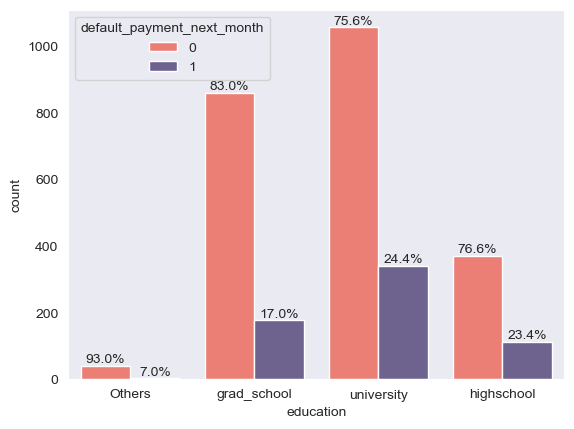

In [28]:
feat = 'education'
hue = 'default_payment_next_month'
hue_type = new_data[hue].dtype.type
groups = new_data[feat].unique()
proportions = new_data.groupby(feat)[hue].value_counts(normalize=True)
sns.set_style("dark")
ax = sns.countplot(x=feat, hue=hue, data=new_data,  palette=["#FF6F61", "#6B5B95"])
for c in ax.containers:
    labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]
    ax.bar_label(c, labels)

Dari hasil yang diperoleh secara keseluruhan, terlihat bahwa individu dengan pendidikan tinggi cenderung memiliki tingkat default payment yang lebih tinggi dibandingkan dengan individu dengan tingkat pendidikan lainnya. 

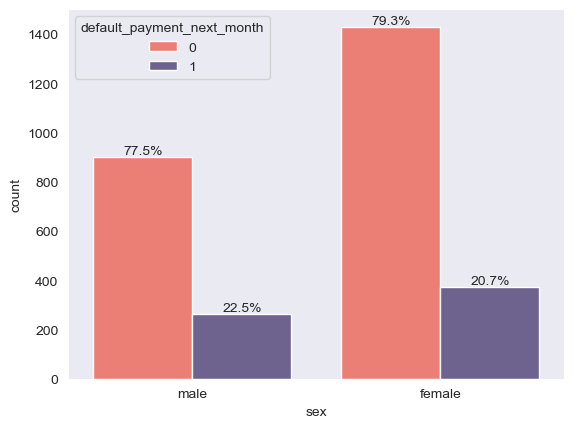

In [29]:
feat = 'sex'
hue = 'default_payment_next_month'
hue_type = new_data[hue].dtype.type
groups = new_data[feat].unique()
proportions = new_data.groupby(feat)[hue].value_counts(normalize=True)
sns.set_style("dark")
ax = sns.countplot(x=feat, hue=hue, data=new_data,  palette=["#FF6F61", "#6B5B95"])
for c in ax.containers:
    labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]
    ax.bar_label(c, labels)

Dari hasil yang didapatkan persentase pria untuk gagal membayar tagihan lebih tinggi dibandingkan pada wanita. Namun secara jumlah total wanita yang memiliki total default lebih tinggi dibandingkan pria

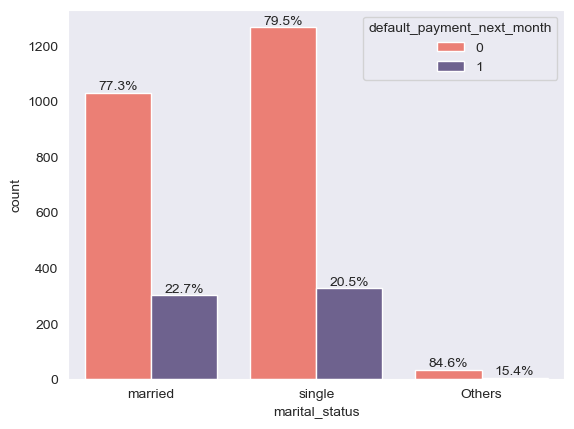

In [30]:
feat = 'marital_status'
hue = 'default_payment_next_month'
hue_type = new_data[hue].dtype.type
groups = new_data[feat].unique()
proportions = new_data.groupby(feat)[hue].value_counts(normalize=True)
sns.set_style("dark")
ax = sns.countplot(x=feat, hue=hue, data=new_data,  palette=["#FF6F61", "#6B5B95"])
for c in ax.containers:
    labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]
    ax.bar_label(c, labels)

Grafik juga menunjukkan bahwa baik individu yang belum menikah maupun yang sudah menikah memiliki jumlah keterlambatan pembayaran kartu kredit yang relatif sama. Namun, individu sudah menikah cenderung memiliki % jumlah keterlambatan pembayaran kartu kredit yang sedikit lebih tinggi daripada individu yang sudah menikah.

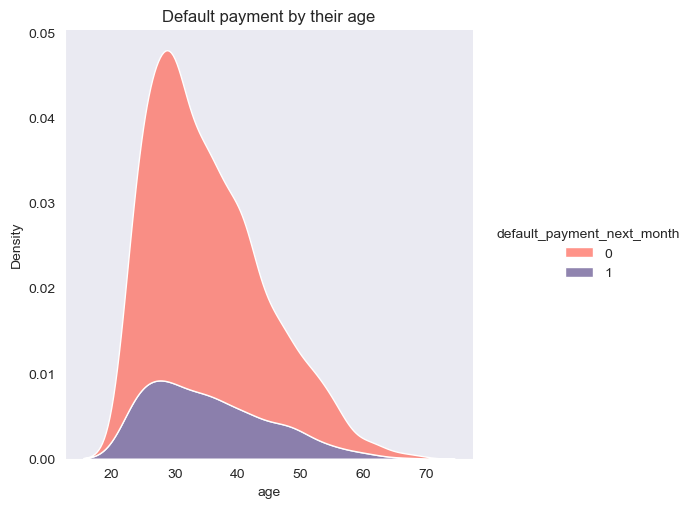

In [31]:
#plotting default payment by their age
sns.displot(data=new_data, x='age', hue='default_payment_next_month', kind="kde", fill=True, multiple='stack', palette=["#FF6F61", "#6B5B95"])
plt.title('Default payment by their age')
plt.show()

Secara keseluruhan orang yang memiliki rentang umur 20 hingga 30 tahun cenderung untuk gagal dalam membayar kartu kredit.

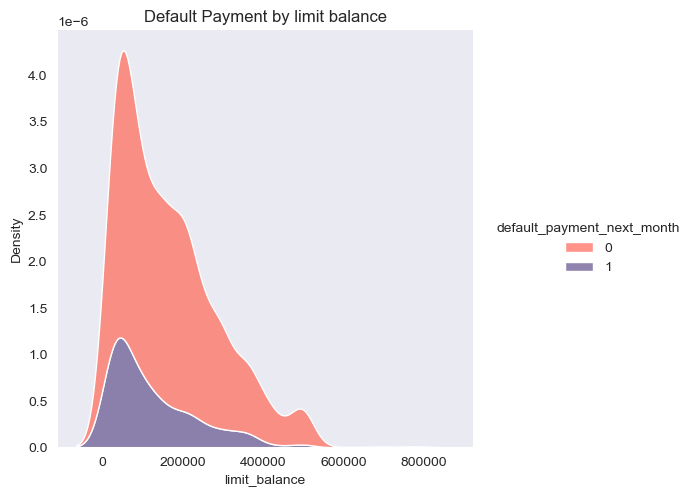

In [32]:
#plotting default payment based on limit balance
sns.displot(data=new_data, x='limit_balance', hue='default_payment_next_month', kind="kde", fill=True, multiple='stack', palette=["#FF6F61", "#6B5B95"])
plt.title('Default Payment by limit balance')
plt.show()

Selain itu, secara umum, individu dengan limit balance rendah atau sedikit rendah cenderung memiliki tingkat keterlambatan pembayaran kartu kredit yang lebih tinggi. Namun, perlu diingat bahwa bukan berarti individu dengan limit balance rendah pasti akan mengalami keterlambatan pembayaran. Terdapat banyak faktor lain yang juga mempengaruhi kemampuan seseorang dalam membayar tagihan kartu kredit.

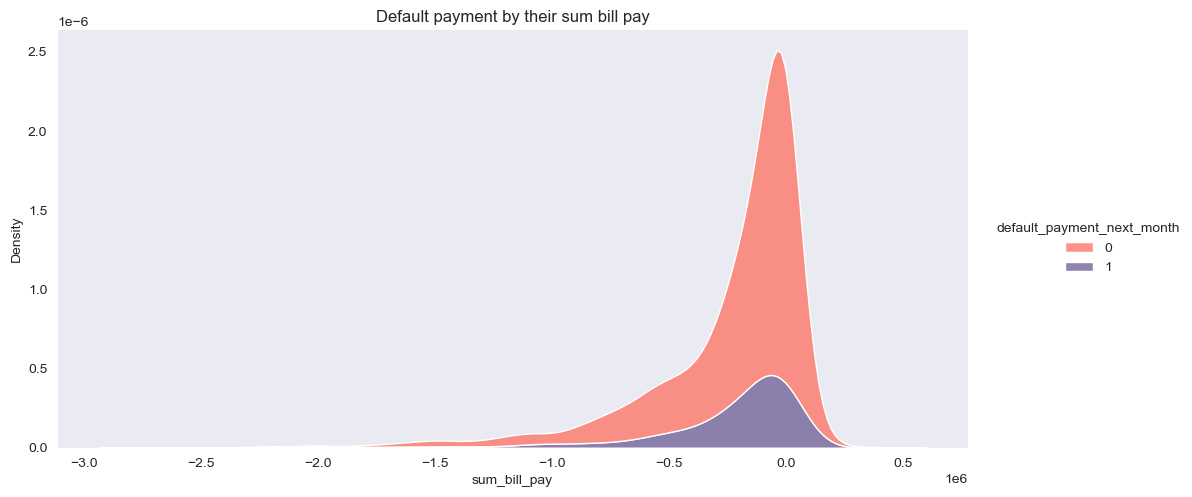

In [33]:
#plotting default payment based on total sum bill payment
sns.displot(data=new_data, x='sum_bill_pay', hue='default_payment_next_month', kind="kde", fill=True, multiple='stack',aspect=2, palette=["#FF6F61", "#6B5B95"])
plt.title('Default payment by their sum bill pay')
plt.show()

Dari plot yang ditampilkan, terlihat bahwa individu yang memiliki total tagihan yang  negatif (bill lebih besar dari total payment) cenderung memiliki tingkat kegagalan atau keterlambatan pembayaran kartu kredit yang lebih tinggi.

#  6- Feature Engineering

In [34]:
#membuat copy data
new_data_1 = new_data.copy()

In [35]:
#melihat column data
new_data_1.columns

Index(['sex', 'education', 'marital_status', 'pay_may', 'pay_april',
       'default_payment_next_month', 'limit_balance', 'age', 'pay_sept',
       'pay_august', 'pay_july', 'pay_june', 'bill_amt_sept',
       'bill_amt_august', 'bill_amt_july', 'bill_amt_june', 'bill_amt_may',
       'bill_amt_april', 'pay_amt_sept', 'pay_amt_august', 'pay_amt_july',
       'pay_amt_june', 'pay_amt_may', 'pay_amt_april', 'sum_bill',
       'average_bill', 'sum_pay', 'average_pay', 'sum_bill_pay'],
      dtype='object')

## Split between `X` (Feature) and `y`(Target)

In [36]:
#memisah feature dan target
X = new_data_1.drop(['default_payment_next_month'], axis = 1)
y = new_data_1['default_payment_next_month']

In [37]:
#memisah feature train test dan target train test
X_train , X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=13, stratify=y)

## Handle Outlier

Adapun step sebelum kita melakukan permodelan , maka dilakukannlah pengecheckan outlier kedalam kolom kolom yang ada dibawah ini

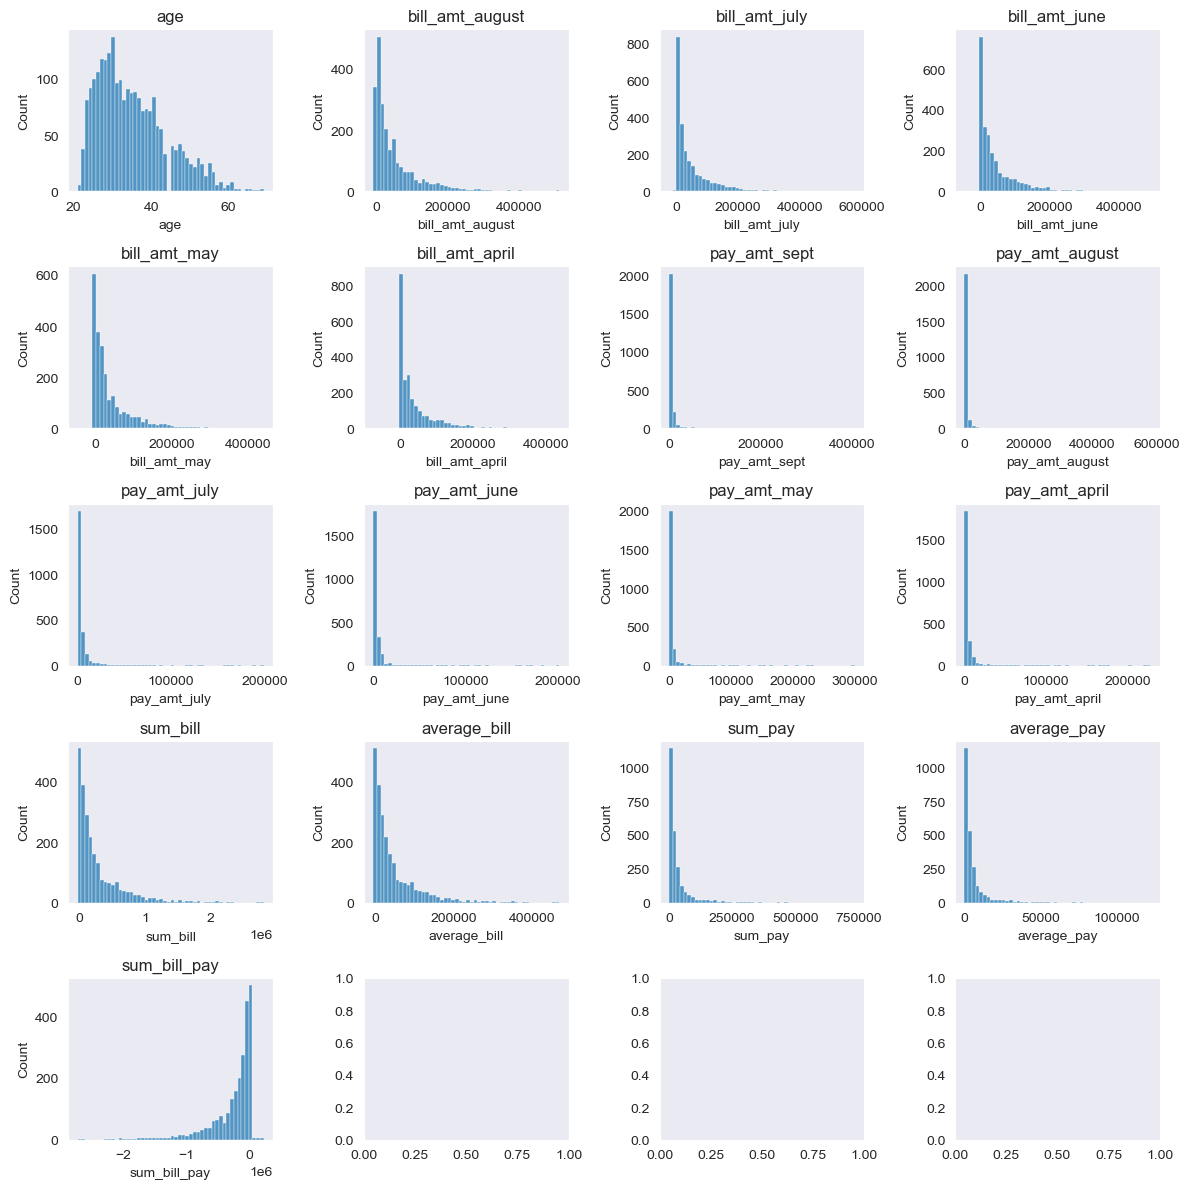

In [38]:
#menampilkan distribusi data pada feature

column = ['age','bill_amt_august', 'bill_amt_july', 'bill_amt_june', 'bill_amt_may',
          'bill_amt_april', 'pay_amt_sept', 'pay_amt_august', 'pay_amt_july',
          'pay_amt_june', 'pay_amt_may', 'pay_amt_april', 'sum_bill',
          'average_bill', 'sum_pay', 'average_pay', 'sum_bill_pay']

fig, axes = plt.subplots(5, 4, figsize=(12, 12)) 

for i, col in enumerate(column):
    row_idx = i // 4 
    col_idx = i % 4 

    sns.histplot(data=X_train[col], bins=50, ax=axes[row_idx, col_idx]) 
    axes[row_idx, col_idx].set_title(col)  

plt.tight_layout() 
plt.show()

Secara keseluruhan dari feature yang ditampilkan, semua feature memiliki distribusi data yang tidak normal atau memiliki skewness

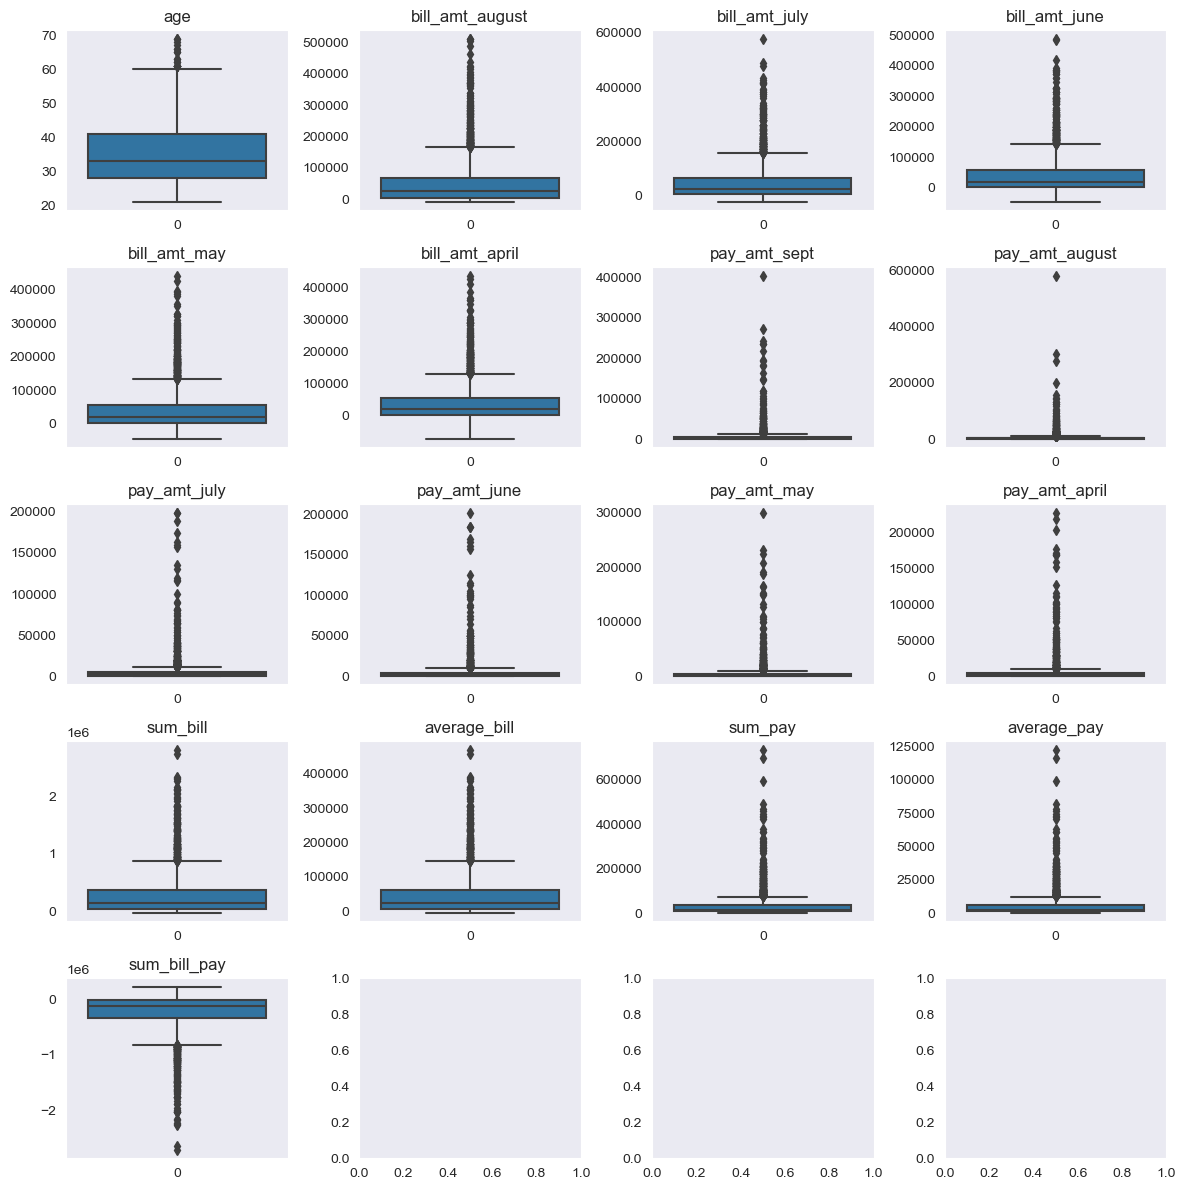

In [39]:
column = ['age','bill_amt_august', 'bill_amt_july', 'bill_amt_june', 'bill_amt_may',
          'bill_amt_april', 'pay_amt_sept', 'pay_amt_august', 'pay_amt_july',
          'pay_amt_june', 'pay_amt_may', 'pay_amt_april', 'sum_bill',
          'average_bill', 'sum_pay', 'average_pay', 'sum_bill_pay']

fig, axes = plt.subplots(5, 4, figsize=(12, 12)) 

for i, col in enumerate(column):
    row_idx = i // 4 
    col_idx = i % 4 

    sns.boxplot(data=X_train[col], ax=axes[row_idx, col_idx]) 
    axes[row_idx, col_idx].set_title(col)  

plt.tight_layout() 
plt.show()

Dikarenakan semua feature memiliki outliers dan kita tidak tahu seberapa besar nilai outliernya, maka akan dilakukan analisa lebih lanjut apakah harus di drop , di cap apa digantikan terhadap nilai mean dari data nya

In [ ]:
def find_outliers(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

for col in column:
    upper_boundary, lower_boundary = find_outliers(X_train, col)
    print('% of outlier yang lebih besar dari outlier {}: {}'.format(col, len(X_train[X_train[col] > upper_boundary])/len(X_train) * 100), end="\n")
    print('% of outlier yang lebih besar dari outlier {}: {}'.format(col, len(X_train[X_train[col] < lower_boundary])/len(X_train) * 100), end="\n")

% of outlier yang lebih besar dari outlier age: 0.8431703204047217
% of outlier yang lebih besar dari outlier age: 0.0
% of outlier yang lebih besar dari outlier bill_amt_august: 7.75716694772344
% of outlier yang lebih besar dari outlier bill_amt_august: 0.0
% of outlier yang lebih besar dari outlier bill_amt_july: 7.546374367622259
% of outlier yang lebih besar dari outlier bill_amt_july: 0.0
% of outlier yang lebih besar dari outlier bill_amt_june: 7.209106239460371
% of outlier yang lebih besar dari outlier bill_amt_june: 0.0
% of outlier yang lebih besar dari outlier bill_amt_may: 8.094435075885329
% of outlier yang lebih besar dari outlier bill_amt_may: 0.0
% of outlier yang lebih besar dari outlier bill_amt_april: 7.883642495784149
% of outlier yang lebih besar dari outlier bill_amt_april: 0.0
% of outlier yang lebih besar dari outlier pay_amt_sept: 9.190556492411467
% of outlier yang lebih besar dari outlier pay_amt_sept: 0.0
% of outlier yang lebih besar dari outlier pay_amt_a

Secara garis besar memang tidak memungkinkan untuk mendrop outlier karena total outliernya yang tinggi dari total datanya, sehingga, cara yang baik adalah dengan men capnya. Capping yang digunakan dalam analisis ini adalah winsorizer

Karena distribusi pada masing masing feature yang sudah dilakukan pengecheckan terhadap distribusinya, semuanya memiliki skewness maka dilakukan capping dengan perhitungan IQR terhadap masing masing featurenya untuk mendapatkan upper boundary dan lower boundarynya

In [ ]:
not_normal = Winsorizer(capping_method='iqr', tail='both', variables= column, fold=1.5)
not_normal.fit(X_train)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['age', 'bill_amt_august', 'bill_amt_july',
                      'bill_amt_june', 'bill_amt_may', 'bill_amt_april',
                      'pay_amt_sept', 'pay_amt_august', 'pay_amt_july',
                      'pay_amt_june', 'pay_amt_may', 'pay_amt_april',
                      'sum_bill', 'average_bill', 'sum_pay', 'average_pay',
                      'sum_bill_pay'])

In [ ]:
#transforming
X_train_t = not_normal.transform(X_train)
X_test_t = not_normal.transform(X_test)

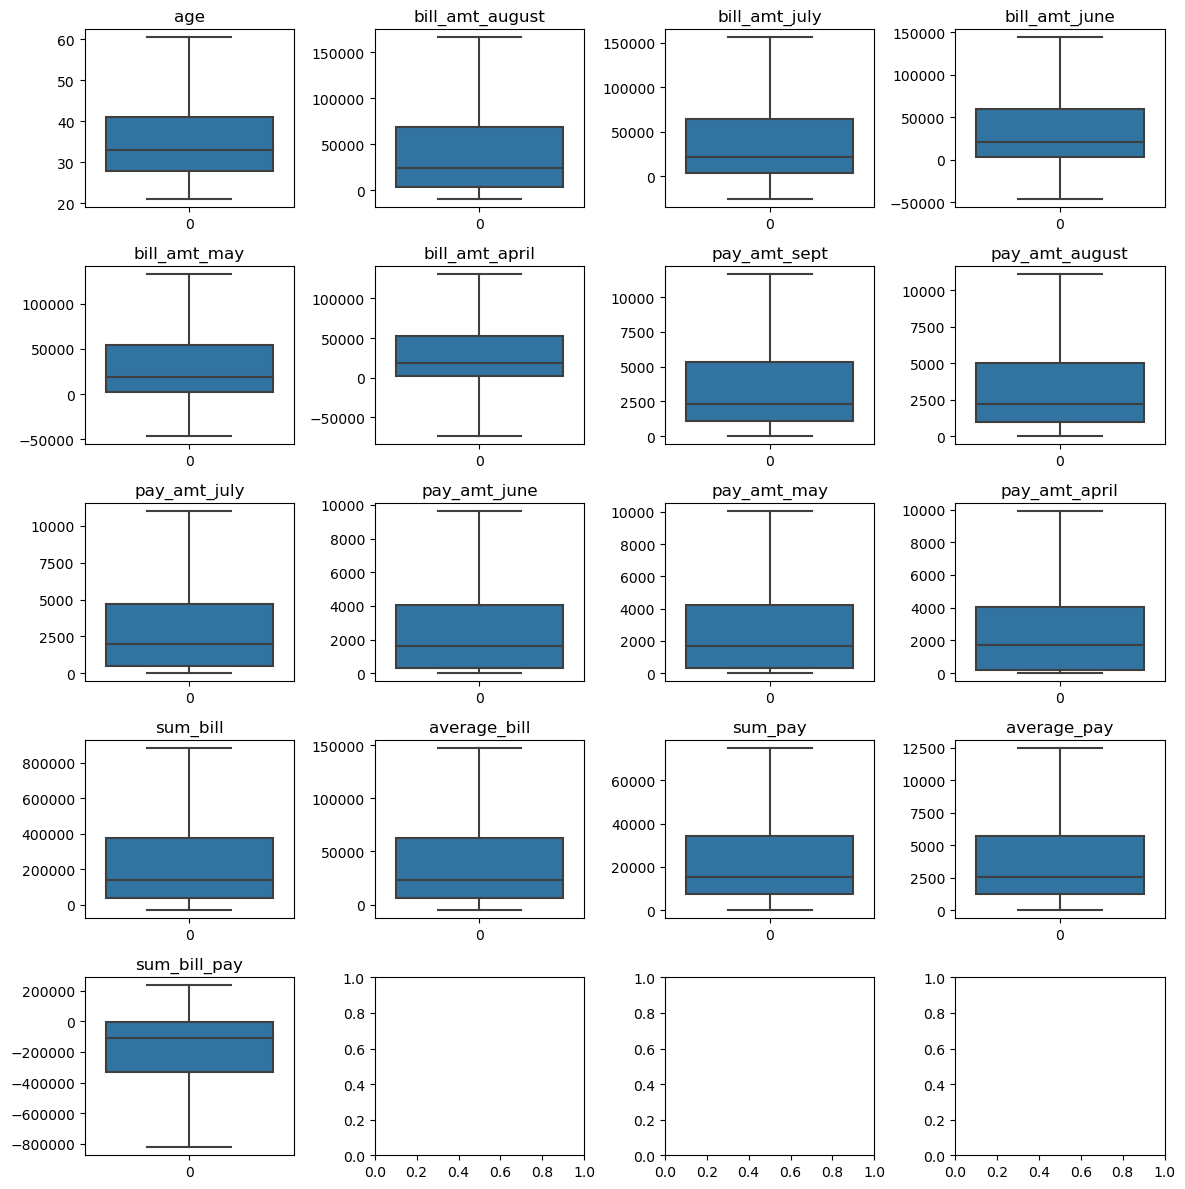

In [ ]:
#memplot boxplot
fig, axes = plt.subplots(5, 4, figsize=(12, 12)) 

for i, col in enumerate(column):
    row_idx = i // 4 
    col_idx = i % 4 

    sns.boxplot(data=X_train_t[col], ax=axes[row_idx, col_idx]) 
    axes[row_idx, col_idx].set_title(col)  

plt.tight_layout() 
plt.show()

## Handle missing values

Setelah dilakukan pengecheckan outlier , maka dilakukan pengecheckan terhadap missing values terhadap target ataupun features

In [ ]:
#checking missing value
X_train_t.isna().sum()

sex                0
education          0
marital_status     0
pay_may            0
pay_april          0
limit_balance      0
age                0
pay_sept           0
pay_august         0
pay_july           0
pay_june           0
bill_amt_sept      0
bill_amt_august    0
bill_amt_july      0
bill_amt_june      0
bill_amt_may       0
bill_amt_april     0
pay_amt_sept       0
pay_amt_august     0
pay_amt_july       0
pay_amt_june       0
pay_amt_may        0
pay_amt_april      0
sum_bill           0
average_bill       0
sum_pay            0
average_pay        0
sum_bill_pay       0
dtype: int64

In [ ]:
#checking missing value
X_test_t.isna().sum()

sex                0
education          0
marital_status     0
pay_may            0
pay_april          0
limit_balance      0
age                0
pay_sept           0
pay_august         0
pay_july           0
pay_june           0
bill_amt_sept      0
bill_amt_august    0
bill_amt_july      0
bill_amt_june      0
bill_amt_may       0
bill_amt_april     0
pay_amt_sept       0
pay_amt_august     0
pay_amt_july       0
pay_amt_june       0
pay_amt_may        0
pay_amt_april      0
sum_bill           0
average_bill       0
sum_pay            0
average_pay        0
sum_bill_pay       0
dtype: int64

In [ ]:
#checking missing value
y_train.isna().sum()

0

In [ ]:
#checking missing value
y_test.isna().sum()

0

Setelah dilakukan pencarian sepertinya tidak ada missing value terhadap feature ataupun target, sehingga kita bisa melanjutkan kedalam feature selection

## Feature Selection

Sebelum dilakukan feature selection, disini saya membuat copy dari x_train agar memudahkan kedepannya nanti

In [ ]:
#membuat temporary dataframe
fe = X_train_t.copy()

In [ ]:
#memasukan target kedalam dataframe
fe['default_payment_next_month'] = y_train

In [ ]:
#overview data
fe.head()

,sex,education,marital_status,pay_may,pay_april,limit_balance,age,pay_sept,pay_august,pay_july,...,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,sum_bill,average_bill,sum_pay,average_pay,sum_bill_pay,default_payment_next_month
2597,female,grad_school,single,-2,-2,180000,43.0,-2,-2,-2,...,5436.0,100.0,9330.0,0.000,14866,2477.666667,14866.0,2477.666667,0.000,0
910,female,university,single,0,0,330000,33.0,0,0,0,...,4800.0,5000.0,5400.0,5100.000,882210,147035.000000,34300.0,5716.666667,-821864.875,0
2869,male,university,married,-2,-2,290000,50.0,1,-2,-2,...,0.0,0.0,0.0,0.000,0,0.000000,0.0,0.000000,0.000,0
1353,male,grad_school,single,0,0,150000,34.0,2,3,2,...,2535.0,5000.0,5000.0,3000.000,243483,40580.500000,15535.0,2589.166667,-227948.000,1
594,male,university,single,0,0,420000,44.0,0,0,0,...,5000.0,5000.0,10000.0,9883.375,80211,13368.500000,37000.0,6166.666667,-43211.000,0


In [ ]:
#memisah feature categorical dan numerical
fe_cat = fe.select_dtypes(include=['object', 'category'])
fe_num = fe.select_dtypes(include=['int', 'float'])
fe_cat['default_payment_next_month'] = fe_num['default_payment_next_month']
fe_cat['default_payment_next_month'] = fe_cat['default_payment_next_month'].astype(str)

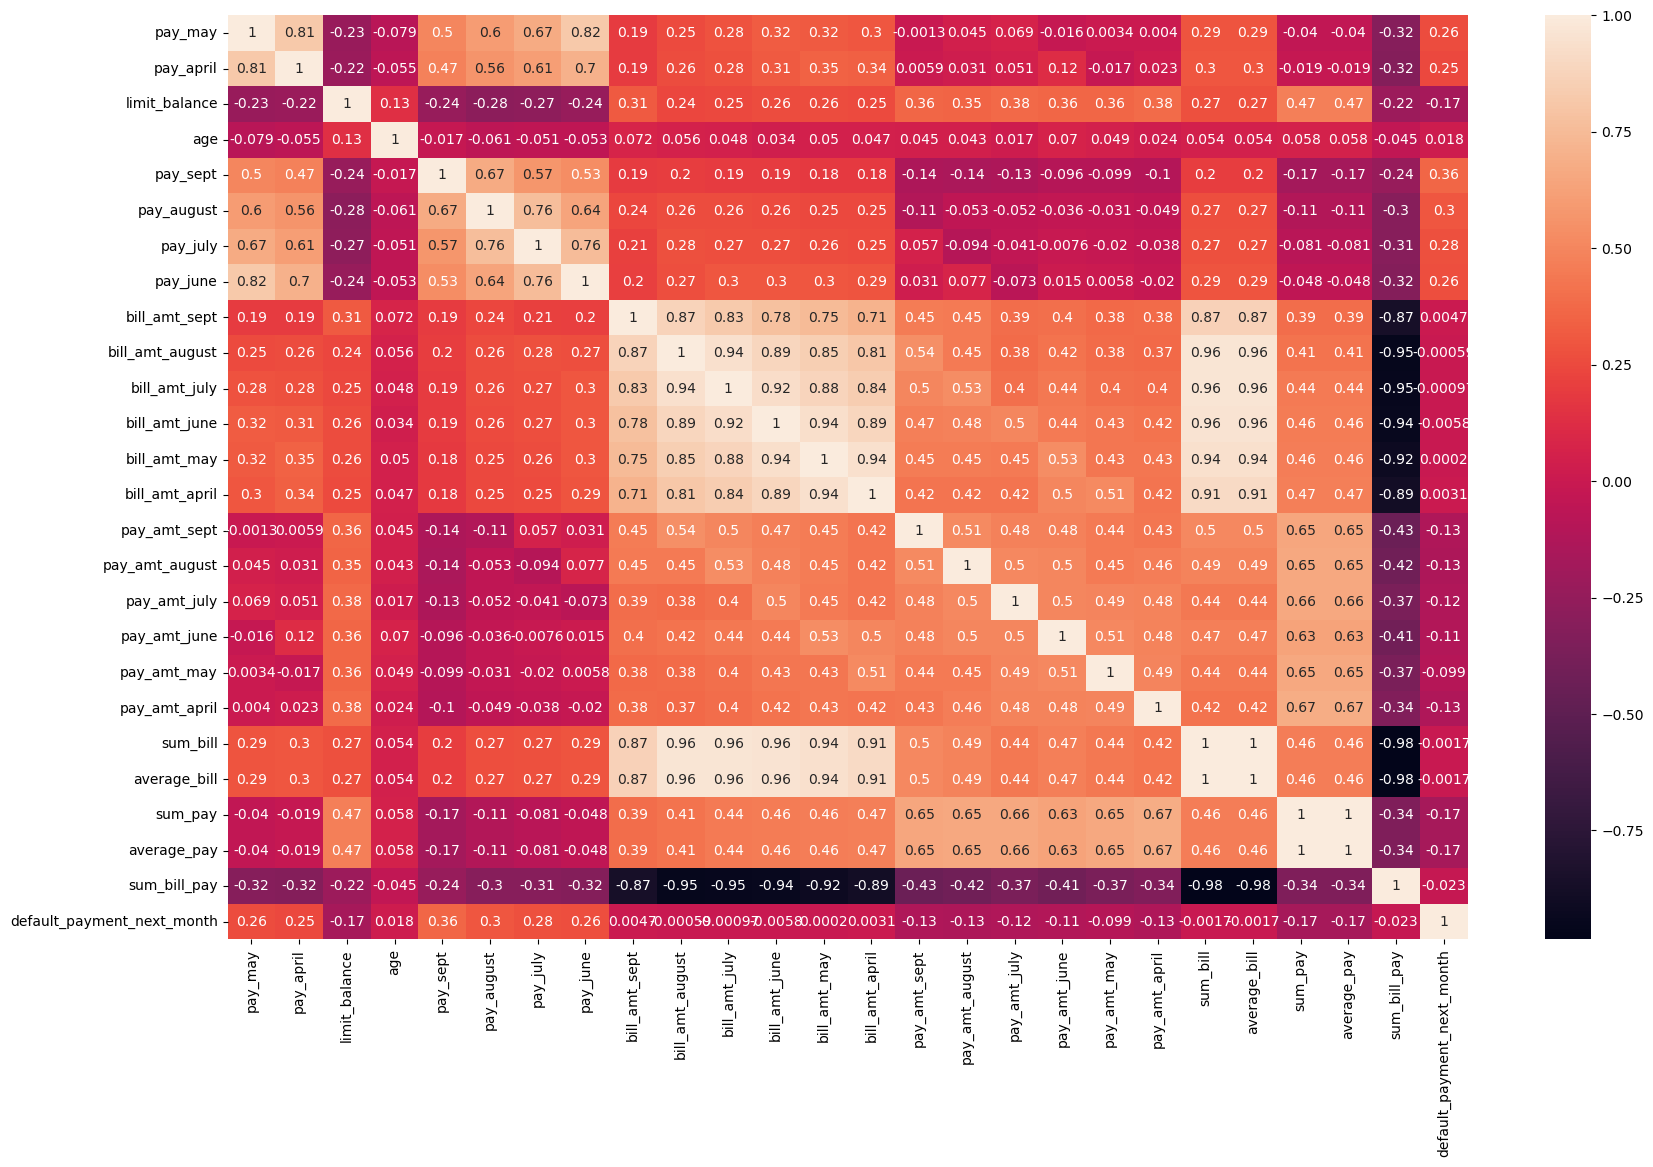

In [ ]:
#membuat heatmap korelasi
plt.figure(figsize=(20,12))
sns.heatmap(fe_num.corr(), annot=True)
plt.show()

Secara garis besar nilai bill_amt diseluruh bulan , sum bill , average bill age, dan sum_bill_pay tidak memiliki nilai korelasi yang tinggi terhadap target dimana nilainya dibawah dari 0.05 sehingga feature feature tersebut bisa di drop saja

In [ ]:
#label encoding
le = LabelEncoder()
for column in fe_cat.columns:
    fe_cat[column] = le.fit_transform(fe_cat[column])

<Axes: >

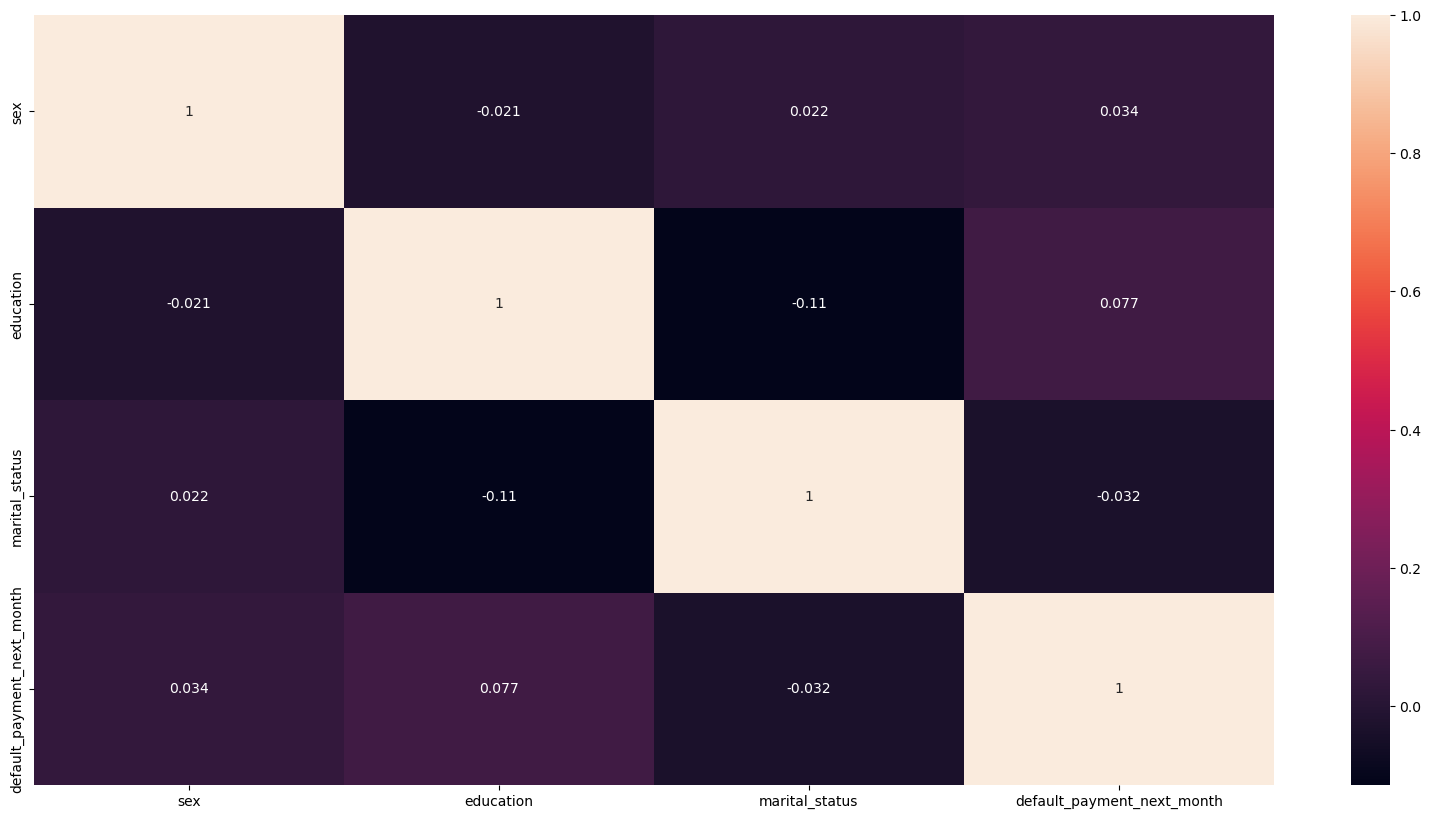

In [ ]:
#membuat heatmap
plt.figure(figsize=(20,10))
sns.heatmap(fe_cat.corr(),annot=True)

Berdasarkan hasil heatmap hanya education saja yang memiliki korelasi yang tinggi terhadap target sehingga feature lainnya bisa dilakukan drop saja

In [ ]:
#Dropping feature
columns = ['bill_amt_sept','bill_amt_august','bill_amt_july','bill_amt_june','bill_amt_may','bill_amt_april','sum_bill_pay', 'sum_bill','age', 'average_bill']
columns2 = ['sex','marital_status']
X_train_t_fs = X_train_t.drop(columns, axis=1)
X_test_t_fs = X_test_t.drop(columns, axis=1)

In [ ]:
#Dropping feature
X_train_t_fs = X_train_t_fs.drop(columns2, axis=1)
X_test_t_fs = X_test_t_fs.drop(columns2, axis=1)

In [ ]:
#overview data
X_train_t_fs

,education,pay_may,pay_april,limit_balance,pay_sept,pay_august,pay_july,pay_june,pay_amt_sept,pay_amt_august,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,sum_pay,average_pay
2597,grad_school,-2,-2,180000,-2,-2,-2,-2,0.0,0.0,5436.000,100.0,9330.0,0.000,14866.000,2477.666667
910,university,0,0,330000,0,0,0,0,7400.0,6600.0,4800.000,5000.0,5400.0,5100.000,34300.000,5716.666667
2869,university,-2,-2,290000,1,-2,-2,-2,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000000
1353,grad_school,0,0,150000,2,3,2,0,0.0,0.0,2535.000,5000.0,5000.0,3000.000,15535.000,2589.166667
594,university,0,0,420000,0,0,0,0,2000.0,5000.0,5000.000,5000.0,10000.0,9883.375,37000.000,6166.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,university,0,0,160000,0,0,0,0,4400.0,3547.0,10979.375,4500.0,4800.0,4500.000,74757.625,12459.604167
1248,highschool,0,0,110000,0,0,0,0,7908.0,4000.0,5000.000,3000.0,3000.0,3000.000,25908.000,4318.000000
2529,university,-2,-2,130000,0,0,0,0,2419.0,1000.0,0.000,200.0,0.0,0.000,3619.000,603.166667
2830,grad_school,-2,-1,150000,-1,-1,-2,-2,0.0,0.0,0.000,0.0,2040.0,9883.375,15101.000,2516.833333


## Split betweeen numerical feature and categorical feature


setelah dilakukan pembersihan outlier , missing value , dan feature selection . Maka kita dapat melanjutkan memecah numerical feature dan categorical feature

In [ ]:
#splitting numerical feature dan categorical feature
cat_features = X_train_t_fs.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = X_train_t_fs.select_dtypes(include=['int', 'float']).columns.tolist()

In [ ]:
#membuat df berdasarkan feature dan categorical feature
X_train_num_t_fs = X_train_t_fs[num_features]
X_train_cat_t_fs = X_train_t_fs[cat_features]
X_test_num_t_fs = X_test_t_fs[num_features]
X_test_cat_t_fs = X_test_t_fs[cat_features]

# Feature Scalling

Karena dari beberapa feature memiliki nilai negative didalamnya, maka disini saya menggunakan standardscaller dalam feature scalling

In [ ]:
#menggunakan standardscaller
scaler = StandardScaler()
scaler.fit(X_train_num_t_fs)
X_train_num_scaled_t_fs = scaler.transform(X_train_num_t_fs)
X_test_num_scaled_t_fs = scaler.transform(X_test_num_t_fs)
X_train_num_scaled_t_fs = pd.DataFrame(X_train_num_scaled_t_fs, columns= num_features)
X_test_num_scaled_t_fs = pd.DataFrame(X_test_num_scaled_t_fs, columns= num_features)

# Feature Encoding




Pada kategori feature sebenarnya hanya tersisa education saja, dimana didalam feature tersebut memiliki tingkatan pada valuenya. Sehingga dalam pemilihan encodernya digunakan OrdinalEncoder

In [ ]:
#unique value
X_train_cat_t_fs.education.unique()

array(['grad_school', 'university', 'highschool', 'Others'], dtype=object)

Karena education memiliki tingkatan , maka selain dari education akan melakukan OneHotEncoder sedangkan pada kolom education akan dilakukan

In [ ]:
#categorical encoding
oe = OrdinalEncoder(categories=[['Others', 'grad_school' ,'highschool' , 'university']])
oe.fit(X_train_cat_t_fs[['education']])
X_train_cat_oe_t_fs = oe.transform(X_train_cat_t_fs[['education']])
X_test_cat_oe_t_fs = oe.transform(X_test_cat_t_fs[['education']])


In [ ]:
#mmembuat dataframe
X_train_cat_oe_t_fs = pd.DataFrame(X_train_cat_oe_t_fs, columns= cat_features)
X_test_cat_oe_t_fs = pd.DataFrame(X_test_cat_oe_t_fs, columns= cat_features)

## Concate between Numeric Columns and Category Columns

In [ ]:
#menggabungkan data 
X_train_final = pd.concat([X_train_cat_oe_t_fs, X_train_num_scaled_t_fs], axis=1)
X_test_final = pd.concat([X_test_cat_oe_t_fs, X_test_num_scaled_t_fs], axis=1)

In [ ]:
#overview data
X_train_final

,education,pay_may,pay_april,limit_balance,pay_sept,pay_august,pay_july,pay_june,pay_amt_sept,pay_amt_august,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,sum_pay,average_pay
0,1.0,-1.529717,-1.491121,0.137026,-1.802349,-1.610637,-1.582242,-1.552924,-1.013376,-1.008837,0.674998,-0.873994,2.076336,-0.890361,-0.413586,-0.413586
1,3.0,0.190761,0.205253,1.331097,-0.019170,0.087332,0.109477,0.153207,1.022260,0.865124,0.488446,0.747949,0.823536,0.752228,0.434157,0.434157
2,3.0,-1.529717,-1.491121,1.012678,0.872420,-1.610637,-1.582242,-1.552924,-1.013376,-1.008837,-0.919493,-0.907095,-0.897868,-0.890361,-1.062065,-1.062065
3,1.0,0.190761,0.205253,-0.101788,1.764009,2.634287,1.801195,0.153207,-1.013376,-1.008837,-0.175925,0.747949,0.696025,0.075868,-0.384403,-0.384403
4,3.0,0.190761,0.205253,2.047540,-0.019170,0.087332,0.109477,0.153207,-0.463204,0.410831,0.547110,0.747949,2.289918,2.292840,0.551935,0.551935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,3.0,0.190761,0.205253,-0.022183,-0.019170,0.087332,0.109477,0.153207,0.197002,-0.001725,2.300984,0.582444,0.632269,0.558983,2.198984,2.198984
2368,2.0,0.190761,0.205253,-0.420207,-0.019170,0.087332,0.109477,0.153207,1.162004,0.126897,0.547110,0.085931,0.058468,0.075868,0.068084,0.068084
2369,3.0,-1.529717,-1.491121,-0.260997,-0.019170,0.087332,0.109477,0.153207,-0.347943,-0.724903,-0.919493,-0.840893,-0.897868,-0.890361,-0.904198,-0.904198
2370,1.0,-1.529717,-0.642934,-0.101788,-0.910759,-0.761653,-1.582242,-1.552924,-1.013376,-1.008837,-0.919493,-0.907095,-0.247560,2.292840,-0.403335,-0.403335


#  7-Model Definition

## Objective model , metrics dan business problem 

Berdasarkan tujuan yang telah ditetapkan sebelumnya, beberapa algoritma digunakan dalam analisis untuk memilih algoritma terbaik berdasarkan hasil cross_val_score atau cross_validate sebagai parameter yang diperhatikan. Dalam kasus ini, metrik yang diperhatikan adalah accuracy sebagai tolak ukur untuk membandingkan kinerja algoritma-algoritma yang digunakan. Alasan digunakannya accuracy yaitu guna mengevaluasi secara keseluruhan model dalam memprediksi true positive dengan false positivenya.  Selain dari accuracy , presisi membantu dalam mengevaluasi true positive dan false positive. Alasan penggunaan metrik presisi dalam kasus ini adalah karena dalam konteks kasusnya, yakni memprediksi apakah seseorang akan melakukan pembayaran tunggakan (default payment) pada bulan depan, saya menganggap bahwa false positive juga merupakan tolak ukur yang penting dalam mengevaluasi keberhasilan model. Misalkan dalam bisnis kita lebih banyak salah memprediksi seseorang yang seharusnya tidak default payment tapi terdeteksi melakukan pembayaran tunggakan, maka bisnis dengan kata lain bank mengalami penurunan kepercayaan dari penggunannya. Sehingga dalam hal ini akan berakibat fatal kedepannya apabila pelanggan tidak lagi menggunakan bank tersebut dan menarik semua aset yang ada dalam bank tersebut. Meskipun melihat dari sisi recall juga penting , namun menurut saya precision dan accuracy merupakan hal pertama yang harus di prioritaskan dalam membuat model.

## Logistic Regression	

Logistic Regression adalah algoritma yang digunakan untuk melakukan klasifikasi biner atau multikelas. Algoritma ini menggunakan fungsi logistik untuk memprediksi probabilitas .Kelebihannya adalah mudah diinterpretasikan, komputasi yang efisien, dan dapat digunakan untuk memahami pengaruh variabel-variabel prediktor terhadap variabel target, namun algoritma ini memiliki kekurangan yaitu Cenderung tidakkerja dengan baik pada dataset yang memiliki fitur-fitur non-linear, dan tidak mampu menangani interaksi kompleks

## SVM

SVM adalah algoritma yang digunakan untuk klasifikasi biner atau multikelas. Algoritma ini mencari hyperplane optimal yang memaksimalkan margin antara kelas-kelas. Kelebihann algoritma ini dapat bekerja dengan baik pada dataset yang memiliki jumlah fitur yang lebih besar dibanding sampel, dan memiliki kemampuan untuk menangani dataset yang tidak linier melalui kernel. sedangkan kekurangannnya yaitu membutuhkan waktu komputasi yang relatif lebih lama dan kompleksitasnya meningkat secara eksponensial dengan jumlah fitur dan ukuran dataset.

## Decision Tree	

Decision Tree adalah algoritma yang menggunakan struktur pohon untuk membuat keputusan berdasarkan pengujian terhadap fitur-fitur pada dataset.
Kelebihannya adalah yaitu mudah dipahami dan diinterpretasikan, dapat menangani dataset dengan fitur yang tidak terstruktur. Namun kekurangannya yaitu cenderung memiliki kecenderungan overfitting pada data training dan dapat menghasilkan pohon yang kompleks dan sulit diinterpretasikan jika tidak dikendalikan.

## Random Forest



Random Forest adalah ensemble dari Decision Tree. Algoritma ini menggunakan beberapa pohon keputusan dan menggabungkan hasil prediksi mereka untuk menghasilkan prediksi yang lebih akurat.
Kelebihan dari algoritma ini mampu menangani dataset dengan fitur yang tidak terstruktur, dapat melibatkan paralelisasi untuk meningkatkan kecepatan, dan mengurangi risiko overfitting yang umum terjadi pada Decision Tree Kekurangannya yaitu , lebih lambat dalam pelatihan dan prediksi daripada Decision Tree tunggal, dan sulit untuk diinterpretasikan jika menggunakan jumlah pohon yang besar.

## KNN

KNN adalah algoritma klasifikasi yang didasarkan pada konsep bahwa instance yang serupa cenderung terletak dekat satu sama lain dalam ruang fitur.Kelebihannya mudah diimplementasikan dan tidak memerlukan proses pembelajaran yang kompleks, dapat menangani dataset dengan fitur yang tidak terstruktur, dan dapat memberikan hasil yang baik pada dataset dengan jumlah sampel yang sedikit.
Adapun kekurangannya yaitu , sangat sensitif terhadap skala dan dimensi fitur, dan dapat membutuhkan waktu komputasi yang lama jika datasetnya besar.

## Naive Bayes	

Naive Bayes adalah algoritma klasifikasi yang bekerja berdasarkan asumsi independensi antara fitur-fitur pada dataset. Adapaun kelebihannya yaitu mudah diimplementasikan, komputasi yang cepat, dan dapat memberikan hasil yang baik pada dataset dengan jumlah sampel yang sed.Kekurangannya yaitu asumsi independensi yang kuat dapat membuat algoritma ini tidak efektif pada dataset yang memiliki ketergantungan kompleks antara fitur-fitur, dan memiliki kecenderungan underfitting jika asumsi independensi tidak terpenuhi.

## Metrics

Adapun selain dari accuracy dan precision saya memakai metrics lainnya yaitu recall dan f1 score.

Precision: Merupakan metrik yang mengukur sejauh mana prediksi positif yang dihasilkan oleh model adalah benar. Precision dihitung sebagai rasio true positive dibagi dengan jumlah total prediksi positif (true positive + false positive).

Recall: Merupakan metrik yang mengukur sejauh mana model dapat mendeteksi atau mengingat kelas positif yang sebenarnya. Recall dihitung sebagai rasio true positive dibagi dengan jumlah total sampel positif (true positive + false negative).

F1-score: Merupakan metrik yang menggabungkan precision dan recall untuk memberikan ukuran yang seimbang antara keduanya. F1-score dihitung sebagai harmonic mean dari precision dan recall.
Support: Merupakan jumlah sampel yang ada dalam setiap kelas pada data yang dievaluasi.

# 8 - Model Training

In [ ]:
#inisiasi variable
log_reg = LogisticRegression()
svc_reg = SVC()
dt_reg = DecisionTreeClassifier()
rf_reg = RandomForestClassifier()
knn_reg = KNeighborsClassifier()
nb_reg = GaussianNB()

In [ ]:
#fitting model 
log_reg.fit(X_train_final, y_train)
svc_reg.fit(X_train_final, y_train)
dt_reg.fit(X_train_final, y_train)
rf_reg.fit(X_train_final, y_train)
knn_reg.fit(X_train_final, y_train)
nb_reg.fit(X_train_final, y_train)

GaussianNB()

# 9 - Model Evaluation

Classification Report  : 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       466
           1       0.73      0.28      0.40       127

    accuracy                           0.82       593
   macro avg       0.78      0.62      0.65       593
weighted avg       0.81      0.82      0.79       593

Confusion Matrix      : 
Accuracy Score - Mean - Cross Validation :  0.8144993590656602
Accuracy Score - Std - Cross Validation  :  0.0054144704515940575


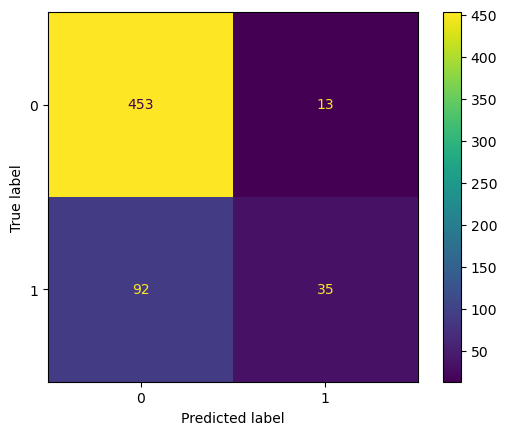

In [ ]:
#evaluasi model logistic regression
y_pred = log_reg.predict(X_test_final)
print('Classification Report  : \n', classification_report(y_test, y_pred))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(log_reg, X_test_final, y_test, cmap='viridis'))
accuracy_score_train_cross_val_log_reg = cross_val_score(log_reg,
                                           X_test_final,
                                           y_test,
                                           cv=5,
                                           scoring='accuracy')
print('Accuracy Score - Mean - Cross Validation : ', accuracy_score_train_cross_val_log_reg.mean())
print('Accuracy Score - Std - Cross Validation  : ', accuracy_score_train_cross_val_log_reg.std())

Berdasarkan hasil yang didapatkan untuk algoritma logitsticregression, algoritma diatas mempunyai precision sebesar 0.73 ,ini berarti 73% dari semua kasus yang diprediksi sebagai default payment oleh model adalah benar-benar default payment. sedangkan dalam nilai  recall untuk kelas 1 adalah 0.28. Ini berarti model hanya dapat menemukan 28% dari semua kasus sebenarnya yang merupakan default payment. Dalam kasus ini, f1-score untuk kelas 1 adalah 0.40,  model memiliki keseimbangan yang relatif rendah antara presisi dan recall. Kemudian kalau dari akurasi, model ini mempunyai akurasi sbesar 0.81 , artinya model dapat memprediksi sebesar 81% secara keseluruhan entah itu true positive + false positive terhadap keseluruhan yang ada.

Classification Report  : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       466
           1       0.72      0.34      0.46       127

    accuracy                           0.83       593
   macro avg       0.78      0.65      0.68       593
weighted avg       0.82      0.83      0.80       593

Confusion Matrix      : 
Accuracy Score - Mean - Cross Validation :  0.797621421449936
Accuracy Score - Std - Cross Validation  :  0.01948565327568788


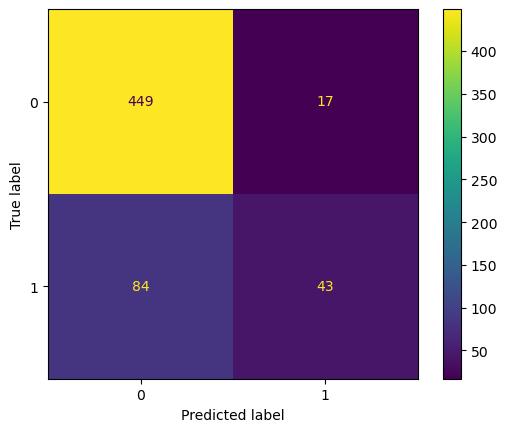

In [ ]:
#evaluasi model svc
y_pred = svc_reg.predict(X_test_final)
print('Classification Report  : \n', classification_report(y_test, y_pred))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc_reg, X_test_final, y_test, cmap='viridis'))
accuracy_score_train_cross_val_svc_reg = cross_val_score(svc_reg,
                                           X_test_final,
                                           y_test,
                                           cv=5,
                                           scoring='accuracy')
print('Accuracy Score - Mean - Cross Validation : ', accuracy_score_train_cross_val_svc_reg.mean())
print('Accuracy Score - Std - Cross Validation  : ', accuracy_score_train_cross_val_svc_reg.std())


Berdasarkan hasil yang didapatkan untuk algoritma svc, algoritma diatas mempunyai precision sebesar 0.72 ,ini berarti 72% dari semua kasus yang diprediksi sebagai default payment oleh model adalah benar-benar default payment. sedangkan dalam nilai  recall untuk kelas 1 adalah 0.34. Ini berarti model hanya dapat menemukan 34% dari semua kasus sebenarnya yang merupakan default payment. Dalam kasus ini, f1-score untuk kelas 1 adalah 0.46,  model memiliki keseimbangan yang relatif rendah antara presisi dan recall. Kemudian kalau dari akurasi, model ini mempunyai akurasi sbesar 0.79 , artinya model dapat memprediksi sebesar 79 % secara keseluruhan entah itu true positive + false positive terhadap keseluruhan yang ada.

Classification Report  : 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       466
           1       0.38      0.43      0.41       127

    accuracy                           0.73       593
   macro avg       0.61      0.62      0.62       593
weighted avg       0.74      0.73      0.74       593

Confusion Matrix      : 
Accuracy Score - Mean - Cross Validation :  0.7469876086027631
Accuracy Score - Std - Cross Validation  :  0.022007113130053085


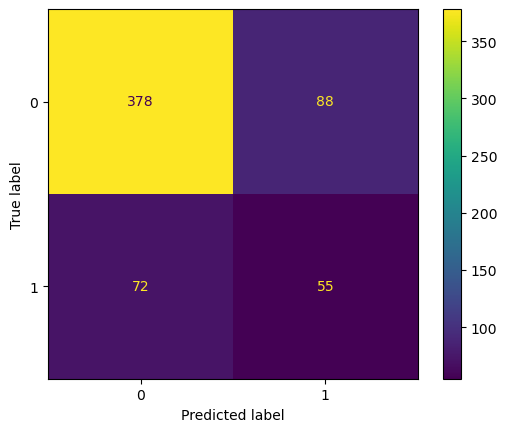

In [ ]:
#evaluasi model dt
y_pred = dt_reg.predict(X_test_final)
print('Classification Report  : \n', classification_report(y_test, y_pred))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_reg, X_test_final, y_test, cmap='viridis'))
accuracy_score_train_cross_val_dt_reg = cross_val_score(dt_reg,
                                           X_test_final,
                                           y_test,
                                           cv=5,
                                           scoring='accuracy')
print('Accuracy Score - Mean - Cross Validation : ', accuracy_score_train_cross_val_dt_reg.mean())
print('Accuracy Score - Std - Cross Validation  : ', accuracy_score_train_cross_val_dt_reg.std())


Berdasarkan hasil yang didapatkan untuk algoritma decision tree, algoritma diatas mempunyai precision sebesar 0.40 ,ini berarti 40% dari semua kasus yang diprediksi sebagai default payment oleh model adalah benar-benar default payment. sedangkan dalam nilai  recall untuk kelas 1 adalah 0.43. Ini berarti model hanya dapat menemukan 36% dari semua kasus sebenarnya yang merupakan default payment. Dalam kasus ini, f1-score untuk kelas 1 adalah 0.41,  model memiliki keseimbangan yang relatif rendah antara presisi dan recall. Kemudian kalau dari akurasi, model ini mempunyai akurasi sbesar 0.75 , artinya model dapat memprediksi sebesar 75 % secara keseluruhan entah itu true positive + false positive terhadap keseluruhan yang ada.

Classification Report  : 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       466
           1       0.61      0.39      0.48       127

    accuracy                           0.82       593
   macro avg       0.73      0.66      0.68       593
weighted avg       0.80      0.82      0.80       593

Confusion Matrix      : 
Accuracy Score - Mean - Cross Validation :  0.8026776812419885
Accuracy Score - Std - Cross Validation  :  0.012894063780313597


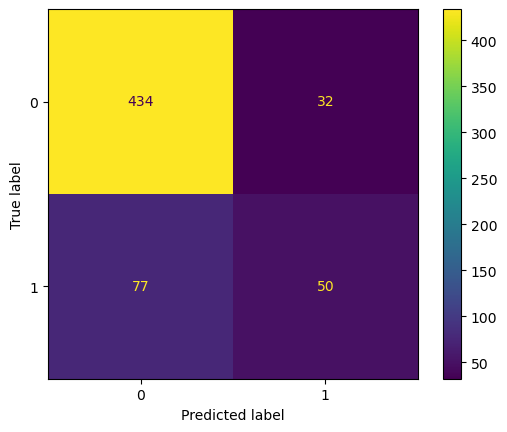

In [ ]:
#evaluasi model rf
y_pred = rf_reg.predict(X_test_final)
print('Classification Report  : \n', classification_report(y_test, y_pred))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_reg, X_test_final, y_test, cmap='viridis'))
accuracy_score_train_cross_val_rf_reg = cross_val_score(rf_reg,
                                           X_test_final,
                                           y_test,
                                           cv=5,
                                           scoring='accuracy')
print('Accuracy Score - Mean - Cross Validation : ', accuracy_score_train_cross_val_rf_reg.mean())
print('Accuracy Score - Std - Cross Validation  : ', accuracy_score_train_cross_val_rf_reg.std())

Berdasarkan hasil yang didapatkan untuk algoritma randomforest, algoritma diatas mempunyai precision sebesar  0.64 ,ini berarti 64% dari semua kasus yang diprediksi sebagai default payment oleh model adalah benar-benar default payment. sedangkan dalam nilai  recall untuk kelas 1 adalah 0.37. Ini berarti model hanya dapat menemukan 37% dari semua kasus sebenarnya yang merupakan default payment. Dalam kasus ini, f1-score untuk kelas 1 adalah 0.47 ,  model memiliki keseimbangan yang relatif rendah antara presisi dan recall. Kemudian kalau dari akurasi, model ini mempunyai akurasi sbesar 0.81, artinya model dapat memprediksi sebesar 81 % secara keseluruhan entah itu true positive + false positive terhadap keseluruhan yang ada.

Classification Report  : 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       466
           1       0.56      0.35      0.43       127

    accuracy                           0.80       593
   macro avg       0.70      0.64      0.66       593
weighted avg       0.78      0.80      0.78       593

Confusion Matrix      : 
Accuracy Score - Mean - Cross Validation :  0.8144993590656602
Accuracy Score - Std - Cross Validation  :  0.0054144704515940575


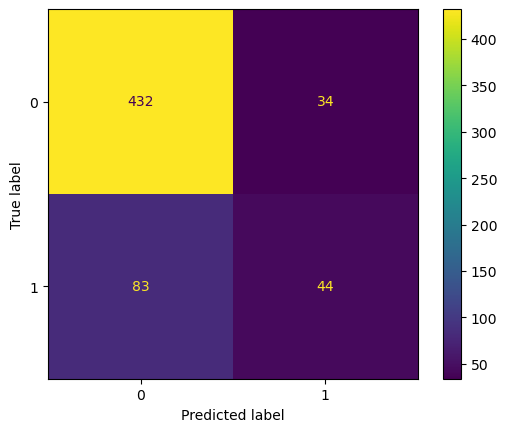

In [ ]:
#evaluasi model knn
y_pred = knn_reg.predict(X_test_final)
print('Classification Report  : \n', classification_report(y_test, y_pred))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_reg, X_test_final, y_test, cmap='viridis'))
accuracy_score_train_cross_val_knn_reg = cross_val_score(log_reg,
                                           X_test_final,
                                           y_test,
                                           cv=5,
                                           scoring='accuracy')
print('Accuracy Score - Mean - Cross Validation : ', accuracy_score_train_cross_val_knn_reg.mean())
print('Accuracy Score - Std - Cross Validation  : ', accuracy_score_train_cross_val_knn_reg.std())

Berdasarkan hasil yang didapatkan untuk algoritma knn, algoritma diatas mempunyai precision sebesar 0.56 ,ini berarti 56% dari semua kasus yang diprediksi sebagai default payment oleh model adalah benar-benar default payment. sedangkan dalam nilai  recall untuk kelas 1 adalah 0.35. Ini berarti model hanya dapat menemukan 35% dari semua kasus sebenarnya yang merupakan default payment. Dalam kasus ini, f1-score untuk kelas 1 adalah 0.43,  model memiliki keseimbangan yang relatif rendah antara presisi dan recall. Kemudian kalau dari akurasi, model ini mempunyai akurasi sbesar 0.814 , artinya model dapat memprediksi sebesar 81,4 % secara keseluruhan entah itu true positive + false positive terhadap keseluruhan yang ada.

Classification Report  : 
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       466
           1       0.50      0.56      0.53       127

    accuracy                           0.79       593
   macro avg       0.69      0.70      0.69       593
weighted avg       0.80      0.79      0.79       593

Confusion Matrix      : 
Accuracy Score - Mean - Cross Validation :  0.6947443384133314
Accuracy Score - Std - Cross Validation  :  0.06084173560936912


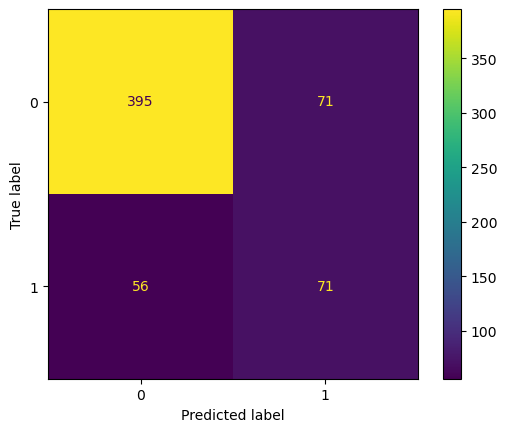

In [ ]:
#evaluasi model nb
y_pred = nb_reg.predict(X_test_final)
print('Classification Report  : \n', classification_report(y_test, y_pred))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb_reg, X_test_final, y_test, cmap='viridis'))
accuracy_score_train_cross_val_nb_reg = cross_val_score(nb_reg,
                                           X_test_final,
                                           y_test,
                                           cv=5,
                                           scoring='accuracy')
print('Accuracy Score - Mean - Cross Validation : ', accuracy_score_train_cross_val_nb_reg.mean())
print('Accuracy Score - Std - Cross Validation  : ', accuracy_score_train_cross_val_nb_reg.std())


Berdasarkan hasil yang didapatkan untuk algoritma naive bayes, algoritma diatas mempunyai precision sebesar 0.50 ,ini berarti 50% dari semua kasus yang diprediksi sebagai default payment oleh model adalah benar-benar default payment. sedangkan dalam nilai  recall untuk kelas 1 adalah 0.56. Ini berarti model hanya dapat menemukan 56% dari semua kasus sebenarnya yang merupakan default payment. Dalam kasus ini, f1-score untuk kelas 1 adalah 0.53,  model memiliki keseimbangan yang relatif rendah antara presisi dan recall. Kemudian kalau dari akurasi, model ini mempunyai akurasi sbesar 0.69 , artinya model dapat memprediksi sebesar 69 % secara keseluruhan entah itu true positive + false positive terhadap keseluruhan yang ada.

In [ ]:
#membuat tabel mean dan std
score_reports = [
    ('logistic', accuracy_score_train_cross_val_log_reg.mean(), accuracy_score_train_cross_val_log_reg.std()),
    ('svc', accuracy_score_train_cross_val_svc_reg.mean(), accuracy_score_train_cross_val_svc_reg.std()),
    ('dt', accuracy_score_train_cross_val_dt_reg.mean(), accuracy_score_train_cross_val_dt_reg.std()),
    ('rf', accuracy_score_train_cross_val_rf_reg.mean(), accuracy_score_train_cross_val_rf_reg.std()),
    ('knn', accuracy_score_train_cross_val_knn_reg.mean(), accuracy_score_train_cross_val_knn_reg.std()),
    ('nb', accuracy_score_train_cross_val_nb_reg.mean(), accuracy_score_train_cross_val_nb_reg.std())
]

df = pd.DataFrame(score_reports, columns=['model', 'mean', 'std'])
df

,model,mean,std
0,logistic,0.814499,0.005414
1,svc,0.797621,0.019486
2,dt,0.746988,0.022007
3,rf,0.802678,0.012894
4,knn,0.814499,0.005414
5,nb,0.694744,0.060842


Dari hasil yang didapatkan ternyata logistic dan KNN merupakan algoritma yang paling baik berdasarkan mean, std dari accuracy yang sudah dilakukan dengan menggunakan cross validation. Ini menandakan mungkin data yang ada terhadap model mempunyai kecocokan terhadap masing masing karakteristik didalam algoritma yang ada. Maka dari hasil diatas maka kita lanjutkan dalam pencarian menggunakan hyperparameter tuning menggunakan gridsearch cv terhadap parameter parameter yang ada didalam masing masing algoritma. Sehingga diharapkan didapatkan hasil model yang lebih baik daripada model yang menggunakan default parameter

### GRIDSEARCH CV

### Parameter LogisticRegression

'classifier__C': Parameter ini mengontrol kekuatan regularisasi pada algoritma Logistic Regression. Semakin kecil nilai C, semakin besar kekuatan regularisasi yang diterapkan. Nilai yang mungkin adalah [0.001, 0.1, 1, 10, 100, 1000].

'classifier__max_iter': Parameter ini menentukan jumlah maksimum iterasi yang akan dilakukan oleh algoritma Logistic Regression. Jumlah iterasi ini mempengaruhi konvergensi model. Nilai yang diberikan adalah [3000].

'classifier__class_weight': Parameter ini menentukan penanganan bobot kelas yang tidak seimbang dalam algoritma Logistic Regression. Jika nilainya adalah None, maka bobot kelas tidak akan diatur. Jika nilainya adalah 'balanced', bobot kelas akan diatur secara proporsional terbalik terhadap frekuensi kelasnya.

'classifier__multi_class': Parameter ini menentukan pendekatan yang akan digunakan dalam menangani masalah multi-klasifikasi pada algoritma Logistic Regression. Nilai yang mungkin adalah 'ovr' (One-vs-Rest) dan 'multinomial'. 'ovr' akan membuat model biner untuk setiap kelas, sedangkan 'multinomial' akan menghasilkan model yang mampu memprediksi lebih dari satu kelas sekaligus.

'classifier__solver': Parameter ini menentukan algoritma solver yang akan digunakan dalam algoritma Logistic Regression. Nilai yang mungkin adalah 'liblinear' dan 'lbfgs'. 'liblinear' digunakan untuk masalah kecil hingga menengah dan mendukung regulasi L1 dan L2, sedangkan 'lbfgs' digunakan untuk masalah yang lebih besar dan mendukung regulasi L2.

'classifier__penalty': Parameter ini menentukan jenis regulasi yang akan digunakan dalam algoritma Logistic Regression. Nilai yang mungkin adalah 'l1', 'l2', dan 'elasticnet'. 'l1' menerapkan regularisasi L1 (Lasso), 'l2' menerapkan regularisasi L2 (Ridge), dan 'elasticnet' menggabungkan kedua jenis regularisasi dengan bobot elastisitas.


In [ ]:
# Membuat pipeline
pipe = Pipeline([
    ('classifier', LogisticRegression())
])
param_grid = {
    'classifier__C': [0.001, 0.1, 1, 10, 100, 1000],
    'classifier__max_iter': [3000],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__multi_class': ['ovr', 'multinomial'],
    'classifier__solver': ['liblinear', 'lbfgs'],
    'classifier__penalty': ['l1', 'l2', 'elasticnet']
}
scorer = make_scorer(accuracy_score)
grid_search_logistic = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring=scorer)
grid_search_logistic.fit(X_train_final, y_train)
print("Best Parameters: ", grid_search_logistic.best_params_)
print("Best Score: ", grid_search_logistic.best_score_)

Best Parameters:  {'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__max_iter': 3000, 'classifier__multi_class': 'ovr', 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Score:  0.8246218076837664


c:\Users\IMBA PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\IMBA PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\IMBA PC\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\IMBA PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, sel

### Parameter KNN

'classifier__n_neighbors': Parameter ini mengontrol jumlah tetangga yang akan digunakan oleh algoritma K-Nearest Neighbors (K-NN) dalam melakukan klasifikasi atau regresi. Nilai yang mungkin adalah bilangan bulat positif seperti 3, 5, dan 7.

'classifier__weights': Parameter ini menentukan bobot yang akan digunakan dalam penghitungan jarak antara titik data saat memprediksi label baru. 'uniform' memberikan bobot yang sama untuk semua tetangga, sedangkan 'distance' memberikan bobot yang berbanding terbalik dengan jaraknya.

'classifier__p': Parameter ini mengontrol metrik jarak yang akan digunakan dalam K-NN. Nilai 1 mengindikasikan penggunaan jarak Manhattan, sedangkan nilai 2 mengindikasikan penggunaan jarak Euclidean.

'classifier__leaf_size': Parameter ini mengontrol ukuran daun dalam struktur data pohon yang digunakan oleh algoritma K-NN. Nilai yang mungkin adalah bilangan bulat positif seperti 20, 30, dan 40.

'classifier__algorithm': Parameter ini menentukan algoritma yang akan digunakan dalam implementasi K-NN. Nilai yang mungkin adalah 'auto', 'ball_tree', 'kd_tree', dan 'brute'. 'auto' akan memilih algoritma terbaik berdasarkan data yang diberikan.

'classifier__metric': Parameter ini mengontrol metrik jarak yang akan digunakan dalam K-NN. Nilai yang mungkin adalah 'euclidean', 'manhattan', dan 'minkowski'. 'euclidean' menggunakan jarak Euclidean, 'manhattan' menggunakan jarak Manhattan, dan 'minkowski' menggunakan jarak Minkowski.

In [ ]:
# Membuat pipeline
pipe_knn = Pipeline([
    ('classifier', KNeighborsClassifier())
])

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2],
    'classifier__leaf_size': [20, 30, 40],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(pipe_knn, param_grid=param_grid_knn, cv=5, scoring = scorer )
grid_search_knn.fit(X_train_final, y_train)

print("KNN - Best Parameters: ", grid_search_knn.best_params_)
print("KNN - Best Score: ", grid_search_knn.best_score_)

KNN - Best Parameters:  {'classifier__algorithm': 'ball_tree', 'classifier__leaf_size': 20, 'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'uniform'}
KNN - Best Score:  0.8174630246502332


### Hasil Gridsearch LogisticRegression dan Default Parameter

In [ ]:
#membandingkan gridsearch dengan default paramter
y_pred = log_reg.predict(X_test_final)
print('Classification Report  : \n', classification_report(y_test, y_pred))
y_pred_test = grid_search_logistic.predict(X_test_final)
print(classification_report(y_test, y_pred_test))
print("Best Parameters: ", grid_search_logistic.best_params_)

Classification Report  : 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       466
           1       0.73      0.28      0.40       127

    accuracy                           0.82       593
   macro avg       0.78      0.62      0.65       593
weighted avg       0.81      0.82      0.79       593

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       466
           1       0.75      0.26      0.39       127

    accuracy                           0.82       593
   macro avg       0.79      0.62      0.64       593
weighted avg       0.81      0.82      0.79       593

Best Parameters:  {'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__max_iter': 3000, 'classifier__multi_class': 'ovr', 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


Dari hasil yang didapatkan ternyata dengan menggunakan parameter parameter yang susdah dimasukkan. Ternyata hanya hasil precision saja yang mengalami peningkatan, sedangkan metrics lainnya mengalami penurunan. Namun sesuai dari tujuan awal yaitu kita mempertimbangkan precision dan accuracy , maka dapat dikatakan model ini mengalami improvement

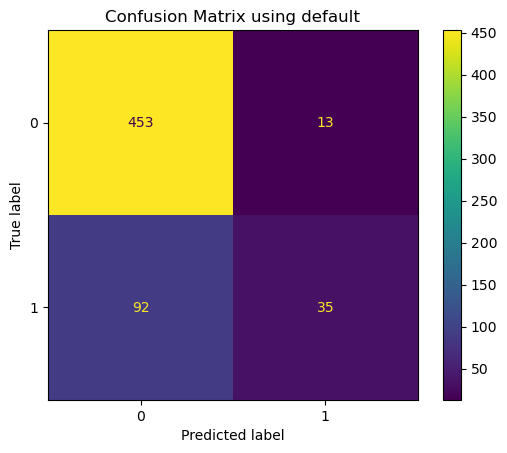

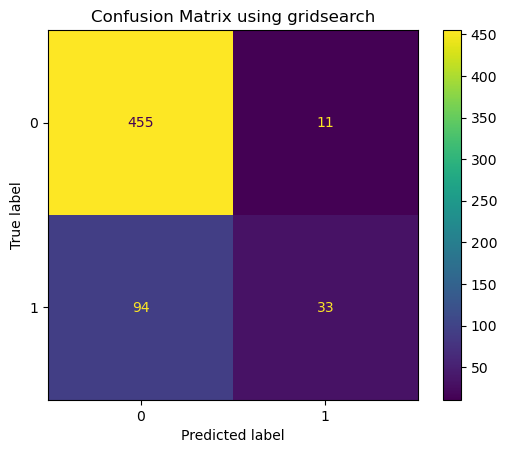

In [ ]:
#plot heatmap confusionmatrix
cm_display = ConfusionMatrixDisplay.from_estimator(log_reg, X_test_final, y_test, cmap='viridis')
plt.title('Confusion Matrix using default')
plt.show()
cm_display = ConfusionMatrixDisplay.from_estimator(grid_search_logistic, X_test_final, y_test, cmap='viridis')
plt.title('Confusion Matrix using gridsearch')
plt.show()

Dari grafik terlihat kesalahan dalam memprediksi seseorang yang seharusnya tidak gagal membayar berkurang, namun prediksi terhadap seseorang yang seharusnya gagal membayar juga ikut berkurang. Secara grafik model menunjukkan hasil yang baik sesuai dari tujuan awal

### Hasil Gridsearch KNN dan Default Parameter

In [ ]:
#membandingkan gridsearch dengan default paramter
y_pred = knn_reg.predict(X_test_final)
print('Classification Report  : \n', classification_report(y_test, y_pred))
y_pred_test = grid_search_knn.predict(X_test_final)
print(classification_report(y_test, y_pred_test))
print("KNN - Best Parameters: ", grid_search_knn.best_params_)


Classification Report  : 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       466
           1       0.56      0.35      0.43       127

    accuracy                           0.80       593
   macro avg       0.70      0.64      0.66       593
weighted avg       0.78      0.80      0.78       593

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       466
           1       0.58      0.33      0.42       127

    accuracy                           0.80       593
   macro avg       0.71      0.63      0.65       593
weighted avg       0.78      0.80      0.78       593

KNN - Best Parameters:  {'classifier__algorithm': 'ball_tree', 'classifier__leaf_size': 20, 'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'uniform'}


Dari hasil yang didapatkan , ternyata dengan menggunakan gridsearch, ternyata nilai precision mengalami peningkatan sebesar 0.02 dibandingkan sebelum menggunakan gridsearch. Dari parameter yang lain mengalami penurunan , namun dari sisi accuracy nilainya tidak berubah. Hal ini dapat dikatakan model mengalami improvement sesuai dari tujuan awal

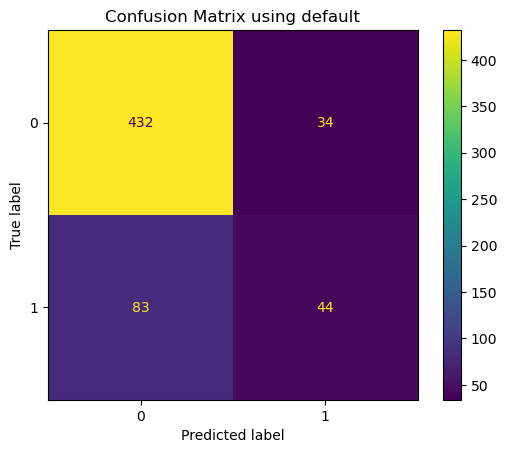

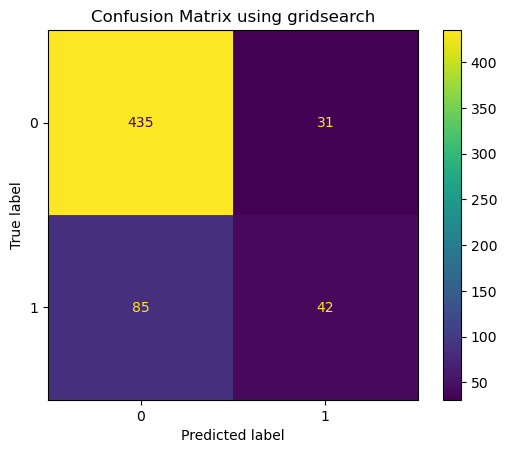

In [ ]:
cm_display = ConfusionMatrixDisplay.from_estimator(knn_reg, X_test_final, y_test, cmap='viridis')
plt.title('Confusion Matrix using default')
plt.show()
cm_display = ConfusionMatrixDisplay.from_estimator(grid_search_knn, X_test_final, y_test, cmap='viridis')
plt.title('Confusion Matrix using gridsearch')
plt.show()

Berdasarkan grafik terjadi penurunan terhadap prediksi seorang yang mengalami kegagalan pembayaran, dan kesalahan dalam memprediksi seseorang yang tidak mengalami kegagalan pembayaaran meningkat

### Model Evaluation Overall and improvement

Dari hasil yang diperoleh, model logistic dan KNN merupakan model yang memiliki nilai accuracy yang paling baik dibandingkan model lainnya. Namun kalau kita lihat dari sisi precision, algoritma Logistic lebih baik dibandingkan KNN. Dalam penggunaan Gridsearch secara garis besar kedua model mengalami peningkatan didalam precisionnya dan accuracy. Dimana dapat dikatakan penggunaan GridSearchCV atau hyperparameter tuning menghasilkan model yang lebih baik daripada menggunakan parameter default . Namun apakah model model ini bisa dikatakan baik ?
Dalam bisnis khususnya dalam hal ini misalkan perbankan yang sebelumnya sudah dijelaskan bahwa ,precision bisa mengurangi resiko penurunan kepercayaan customer terhadap bisnis bank. Sehingga metrics ini sangat memberikan value yang lebih kepada bank. Meskipun begitu apakah model yang sekarang sudah dibuat dalam penggunaan bisnis apakah bisa langsung dipakai? menurut saya , model yang sudah dibuat masih jauh dari harapan dan masih butuh perbaikan. Adapun improvement yang dapat dilakukan kedepannya dalam memperbaiki model antara lain dengan menambahkan total data yang digunakan didalam train, dalam case ini total data yang diberikan menurut saya masih kurang, dimana feature yang digunakan juga masih banyak , sehingga model masih butuh di Train kedalam data yang lebih banyak dan dievaluasi lanjut untuk kedepannya. Kemudian improvement yang dapat dilakukan antara lain, dari data set yang didapatkan proposional nilai target default payment yes dan default payment no masih terbilang beda jauh atau bisa dikatakan imbalance dataset, sehingga mungkin kedepannya kita dapat melakukan SMOTE undersampling ataupun oversampling kepada target,  

# 10 - Model Saving


In [ ]:
#saving model
with open('list_num_features.txt', 'w') as file_a :
    json.dump(num_features, file_a)
with open('list_cat_features.txt', 'w') as file_b :
    json.dump(cat_features, file_b)
with open('model_scaller.pkl', 'wb') as file_c :
    pickle.dump(scaler, file_c)
with open('model_ordinal.pkl', 'wb') as file_d :
    pickle.dump(oe, file_d)
with open('model_log_reg.pkl', 'wb') as file_f :
    pickle.dump(log_reg, file_f)
with open('model_svc_reg.pkl', 'wb') as file_g :
    pickle.dump(svc_reg, file_g)
with open('model_dt_reg.pkl', 'wb') as file_h :
    pickle.dump(dt_reg, file_h)
with open('model_rf_reg.pkl', 'wb') as file_i :
    pickle.dump(rf_reg, file_i)
with open('model_knn_reg.pkl', 'wb') as file_j :
    pickle.dump(knn_reg , file_j)
with open('model_nb_reg.pkl', 'wb') as file_k :
    pickle.dump(nb_reg , file_k)
with open('model_grid_search_logistic.pkl', 'wb') as file_l :
    pickle.dump(grid_search_logistic, file_l)
with open('model_grid_search_knn.pkl', 'wb') as file_m :
    pickle.dump(grid_search_knn, file_m)

# 11 - Model Inference

In [ ]:
#model inferencing
with open('list_num_features.txt', 'rb') as file_1 :
    list_num_features = json.load(file_1)
with open('list_cat_features.txt', 'rb') as file_2 :
    list_cat_features = json.load(file_2)
with open('model_scaller.pkl', 'rb') as file_3 :
    model_scaller = pickle.load(file_3)
with open('model_ordinal.pkl', 'rb') as file_4 :
    model_ordinal = pickle.load(file_4)
with open('model_log_reg.pkl', 'rb') as file_5 :
    model_log_reg = pickle.load(file_5)
with open('model_svc_reg.pkl', 'rb') as file_6 :
    model_svc_reg = pickle.load(file_6)
with open('model_dt_reg.pkl', 'rb') as file_7 :
    model_dt_reg = pickle.load(file_7)
with open('model_rf_reg.pkl', 'rb') as file_8 :
    model_rf_reg = pickle.load(file_8)
with open('model_knn_reg.pkl', 'rb') as file_9 :
    model_knn_reg = pickle.load(file_9)
with open('model_nb_reg.pkl', 'rb') as file_10 :
    model_nb_reg = pickle.load(file_10)
with open('model_grid_search_logistic.pkl', 'rb') as file_11 :
    model_grid_search_logistic = pickle.load(file_11)
with open('model_grid_search_knn.pkl', 'rb') as file_12 :
   model_grid_search_knn = pickle.load(file_12)

In [ ]:
#membuat dataframe
data_inf = { 
            'education' : 'university', 
            'pay_may' : 2,
            'pay_april' : -1,
            'limit_balance' : 200000,
            'pay_sept' : 1,
            'pay_august' : -2,
            'pay_july' : -2,
            'pay_june' : 1,
             'pay_amt_sept' : 40000,
            'pay_amt_august' : 50000,
            'pay_amt_july' : 20000,
            'pay_amt_june' : 30000,
            'pay_amt_may' : 40000,
            'pay_amt_april' : 60000,

}
data_inf = pd.DataFrame([data_inf])
columns = ['pay_amt_sept','pay_amt_august','pay_amt_july','pay_amt_june','pay_amt_may','pay_amt_april']
data_inf['sum_pay'] = data_inf[columns].sum(axis=1)
data_inf['average_pay'] = data_inf[columns].mean(axis=1)
data_inf


,education,pay_may,pay_april,limit_balance,pay_sept,pay_august,pay_july,pay_june,pay_amt_sept,pay_amt_august,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,sum_pay,average_pay
0,university,2,-1,200000,1,-2,-2,1,40000,50000,20000,30000,40000,60000,240000,40000.0


In [ ]:
#splitting numerical dan categorical
data_inf_num = data_inf[list_num_features]
data_inf_cat = data_inf[list_cat_features]
data_inf_num

,pay_may,pay_april,limit_balance,pay_sept,pay_august,pay_july,pay_june,pay_amt_sept,pay_amt_august,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,sum_pay,average_pay
0,2,-1,200000,1,-2,-2,1,40000,50000,20000,30000,40000,60000,240000,40000.0


In [ ]:
#scalling encoder
data_inf_num = model_scaller.transform(data_inf_num)
data_inf_num
data_inf_num = pd.DataFrame(data_inf_num, columns= num_features)

In [ ]:
#ordinalencoder
data_inf_cat_oe = pd.DataFrame(data_inf_cat, columns=['education'])
data_inf_cat_oe = model_ordinal.transform(data_inf_cat_oe)
data_inf_cat_oe = pd.DataFrame(data_inf_cat_oe, columns=['education'])

In [ ]:
#membuat dataframe
data_inf_final = pd.concat([data_inf_cat_oe, data_inf_num], axis=1)
data_inf_final

,education,pay_may,pay_april,limit_balance,pay_sept,pay_august,pay_july,pay_june,pay_amt_sept,pay_amt_august,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,sum_pay,average_pay
0,3.0,1.911239,-0.642934,0.296236,0.87242,-1.610637,-1.582242,1.006272,9.990063,13.187838,4.946918,9.023168,11.853277,18.434218,9.407123,9.407123


In [ ]:
#predicting inference
y_pred_inf_log = model_log_reg.predict(data_inf_final)
y_pred_inf_SVC = model_svc_reg.predict(data_inf_final)
y_pred_inf_dt = model_dt_reg.predict(data_inf_final)
y_pred_inf_rf =  model_rf_reg.predict(data_inf_final)
y_pred_inf_knn = model_knn_reg.predict(data_inf_final)
y_pred_inf_nb = model_nb_reg.predict(data_inf_final)
y_pred_inf_gs_logistic = model_grid_search_logistic.predict(data_inf_final)
y_pred_inf_gs_knn =  model_grid_search_knn.predict(data_inf_final)


In [ ]:
print (y_pred_inf_log)
print (y_pred_inf_SVC)
print (y_pred_inf_dt)
print (y_pred_inf_rf)
print (y_pred_inf_knn)
print (y_pred_inf_nb)
print (y_pred_inf_gs_logistic)
print (y_pred_inf_gs_knn)

[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]


# 12 - Kesimpulan



Dari hasil analisis yang sudah dilakukan, ada beberapa insight yang dapat diperoleh. antara lain individu dengan pendidikan tinggi cenderung memiliki tingkat default payment (gagal membayar tagihan)ebih tinggi dibandingkan dengan individu dengan tingkat pendidikan lainnya, selain itu secara umum wanita memiliki jumlah keterlambatan pembayaran kartu kredit yang lebih tinggi. Dari hasil yang lain individu yang belum menikah maupun yang sudah menikah memiliki jumlah keterlambatan pembayaran kartu kredit yang relatif sama. Namun, individu yang sudah menikah memiliki % yang lebih besar dibandingkan individu yang belum menikah.  Dan hasil yang lainnya kebanyakan dari individu atau orang yang mengalami kegagalan pembayaran kartu kredit berada di rentang uumur 20 hingga 30 tahun. Dari Hasil analisis model - model yang sudah dilakukan dengan berbagai macam algoritma, algoritma logisticRegression memiliki hasil yang paling baik diantara algoritma lainnya. Hal ini ditunjukkan dari hasil mean accuracy dari crossvalidation sebesar 0.82%. Namun perlu diingat hasil dari model yang dilakukan masih jauh dari harapan, dimana nilai dari recall ataupun f1 score yang masih tinggi. Dimana meskipun model baik dalam tidak memprediksi seseorang yang tidak gagal membayar, namun untuk prediksi seseorang yang gagal membayar atau true positive dan true negativenya masih sangat tinggi dan jauh dari harapan. Oleh karena itu masih banyak improvement yang harus dilakukan , dimana salah satunya dengan menambah jumlah data yang perlu di train kedalam model atau melakukan oversampling dan undersampling di data target, sehingga nanti kita dapat mengevaluasi kembali model yang sudah dibuat 

# 13 - Conceptual Problems

Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !
Criterion pada decision tree adalah parameter yang digunakan untuk mengukur kualitas pemisahan atau pemilihan fitur pada setiap simpul dalam membangun pohon keputusan. Adapun yang metrics yang digunakan dalam case ini adalah metrics Gini. Hal ini dikarenakan tujuan awal dalam analisis case ini adalah mencari algoritma awal yang paling  dengan parameter default dari masing masing algoritma, dan dicari nilai mean dan std dari metrics yang dipilih menggunakan cross validation search.

Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !
Pruning adalah proses mengurangi kompleksitas pohon keputusan dengan menghapus simpul-simpul atau cabang-cabang yang tidak signifikan. Tujuannya adalah untuk mencegah overfitting dan membuat model yang lebih generalisasi.
Pruning dapat dilakukan dalam dua bentuk:
Pre-pruning: Proses ini melibatkan penghentian pembangunan pohon sebelum sepenuhnya tumbuh dengan membatasi jumlah maksimum simpul, kedalaman maksimum, atau jumlah minimum sampel dalam simpul untuk memutuskan apakah simpul tersebut akan dipisah lebih lanjut atau tidak.
Post-pruning: Proses ini melibatkan pembangunan pohon secara penuh dan kemudian menghapus simpul-simpul atau cabang-cabang yang dianggap tidak signifikan. Ini dilakukan dengan menggunakan teknik seperti Reduced Error Pruning (REP), Cost Complexity Pruning (CCP), atau Variance Reduction Pruning.
Pruning membantu menghindari overfitting dan membuat model yang lebih sederhana dan mudah diinterpretasikan.

Bagaimana cara memilih K yang optimal pada KNN ?
Untuk memilih K yang optimal pada K-Nearest Neighbors (KNN), beberapa pendekatan yang umum digunakan adalah antara lain
K-Fold Cross Validation: Membagi data menjadi K subset dan melakukan pelatihan dan evaluasi model pada setiap subset. K kemudian dipilih berdasarkan kinerja model di setiap subset.
Grid Search: Mencoba beberapa nilai K yang berbeda dan melakukan validasi silang untuk memilih K yang memberikan kinerja terbaik.


Jelaskan apa yang dimaksud dengan Cross Validation !
Cross Validation adalah teknik yang digunakan untuk mengevaluasi kinerja model dengan membagi data menjadi subset yang saling tumpang tindih, yang disebut fold, dan melakukan pelatihan dan pengujian pada fold tersebut secara bergantian. Tujuan dari Cross Validation adalah untuk menghindari bias dalam evaluasi model dan memberikan perkiraan yang lebih andal tentang kinerja model pada data yang belum pernah dilihat sebelumnya.

Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?
Accuracy: Akurasi mengukur sejauh mana model klasifikasi memberikan prediksi yang benar secara keseluruhan dibandingkan dengan total jumlah sampel. Ini cocok digunakan saat kelas target memiliki distribusi yang seimbang.
Precision: Precision mengukur sejauh mana prediksi positif yang diberikan oleh model benar, atau dalam kata lain, seberapa baik model memprediksi kasus positif dengan tepat.
Recall: Recall, juga dikenal sebagai sensitivitas, mengukur sejauh mana model dapat mengidentifikasi dan menemukan kasus positif secara keseluruhan. Ini memberi tahu seberapa baik model dapat mengenali kasus positif yang ada.
F1 Score: F1 Score adalah ukuran yang menggabungkan precision dan recall. Ini memberikan rata-rata harmonik antara precision dan recall, memberikan gambaran yang lebih baik tentang keseimbangan antara keduanya.
Waktu yang tepat dalam penggunaan masing masing metrics sebenarnya tergantung dari tujuan dan konteksnya. Misalkan pada case yang kita hadapi ini accuracy dan precision merupakan metrics paling penting , dimana precision berguna untuk meminimalkan jumlah kesalahan positif.